## __Unveiling Insights: Analyzing Trends and Patterns Across Diverse News Categories__

<center>
  <img src="https://cdn.pixabay.com/photo/2018/06/21/16/32/newspapers-3488861_1280.jpg" width="500"/>
</center>


# Table of Contents
1. [**Introduction**](#1.Introduction)

   1.1. [**Problem Statement**](#1.1.Problem-Statement)  
   1.2. [**Objectives**](#1.2.Objectives)  
2. [**Importing Packages**](#2.Importing-Packages)  
3. [**Data loading and Inspection**](#3.Data-loading-and-Inspection)    
4. [**Data Cleaning**](#4.Data-Cleaning)  
5. [**Exploratory Data Analysis(EDA)**](#5.Exploratory-Data-Analysis(EDA))
6. [**Data Preprocessing**](#6.Data-Preprocessing)
7. [**Model development**](#7.Model-development)
8. [**Model Evaluation**](#8.Model-Evaluation)
9. [**Model Deployment**](#9.Model-Deployment)
10. [**Conclusion and Recommendations**](#10.Conclusion-and-Recommendations)
11. [**References**](#11.References)

## **1. Introduction**

News articles are a prominent part of the global news landscape. Billions of people rely on digital news articles to inform them on current affairs/events in the world. These articles can cover a variety of topics including sports, technology, business, education and entertainment. This project's main objective is to develop a robust model to correctly categorise a news article to one of the aforementioned categories based on the analyses of the articles’ content.

The data used for the mode(s) is sourced from a Sand Technology Github by Oludare  Adekunle (Adekunle, 2025) and contains a variety of  news articles belonging to the specified categories. It consists of two sets, a train and test set. Each set comprises of  4 predictor variables  and the target variable, namely:
* Headlines: The title of the article that appears above the news story.
* Description: A brief summary of the key facts mentioned in the article.
* Content: The entire news story.
* Url: The web address that directly leads to the news article.
* Category: The category that the news article belongs to.

To achieve our objective, data science techniques are employed whilst leveraging python programming language and its indispensable libraries. The sourced dataset will undergo an extensive data analysis procedure where it will be cleaned and stripped of impurities. Thereafter, essential insights will be extracted during Exploratory data analysis (EDA), based on the the following key questions:
1. Which categories are dominant in the dataset?
2. Which categories are seen the least in the dataset?
3. What is the relationship between the url contents and the category?
4. How many features are considered for model development?
5. Which features are most significant?
6. Which features are least significant?

Furthermore, the dataset will be transformed from text to a numerical format suitable for modelling. Multiple models will be evaluated using MLflow to identify the best 3 model(s) that will be assessed and deployed on a Streamlit app where users can simply input their articles to predict their categories.

This notebook is structured to demonstrate absolute proficiency in conducting  data science procedures. This includes data loading and inspection, data cleaning, data preprocessing, exploratory data analysis (eda), feature extraction, model development and evaluation, along with deployment. The project will demonstrate the real world applications of machine learning algorithms and the value they hold. By the end of this project, we expect to have a fully functional category predictor deployed on Streamlit, utilizing the three best models developed. 

### *1.1. Problem Statement*

There is a need to devise an efficient model that will predict, with absolute accuracy, the category a user’s news article belongs to.

### *1.2. Objectives*

* Clean datasets to eliminate errors and incoherent information.
* Perform exploratory data analysis on the dataset to extract key insights.
* Transform dataset to meaningful features and identify most important features for the models.
* Develop and investigate various classification models to find optimal hyperparameters
* Evaluate the models using performance metrics to identify the best 3 models.
* Integrate the models in Streamlit app to categorise news articles from users.
* Deploy the app. 

## **2. Importing packages**

In this section, the packages that are necessary to execute our data science processes are imported below. These packages range from basic numerical and visualisation ones, to those vital for building and assesing machine learning models such as sklearn. 

### *2.1. Basic packages*

In [43]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter

# Configure settings
%matplotlib inline
warnings.filterwarnings("ignore")

### *2.2. Preprocessing Packages*

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download(['punkt', 'stopwords', 'wordnet', 'punkt_tab'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lebo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lebo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lebo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lebo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### *2.2. Model development packages*

In [3]:
import mlflow
import mlflow.sklearn
from matplotlib.colors import ListedColormap
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### *2.3. Model evaluation packages*

In [4]:
from sklearn.feature_selection import mutual_info_classif

### *2.4. Model deployment packages*

In [5]:
import pickle

## **3. Data loading and Inspection**

In this part, the data that will be used to build and evualate our models will be loaded and inspected. This inspection will provide necessary information about the dataset and inform the data cleaning process to ensure all impurities are eliminated.

### *3.1. Data loading*

The datasets from a Github repository are  sourced as csv files. To initiate our inspection, we first transform them in to a more readable format. Utilising the pandas library, the csv files are read into DataFrames denoted by `train_df` and `test_df`.

In [6]:
# url of the csv file
train_url = "https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/train.csv"
test_url = "https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/test.csv"

# load train data
train_df = pd.read_csv(train_url)

# load test data
test_df = pd.read_csv(test_url)

### *3.2. Data Inspection*

#### *3.2.1. Data Overview*

To begin, we will first look at the overview of our datasets and inspect their shapes to understand the structure of the data.

In [7]:
# Check the shape of the DataFrame
print("Shape of the train dataset:", train_df.shape)
print("Shape of the test dataset:", test_df.shape)

Shape of the train dataset: (5520, 5)
Shape of the test dataset: (2000, 5)


In [8]:
# Display the first 5 rows of the train_df to get a quick overview of the data
train_df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [9]:
# Display the first 5 rows of test_df to get a quick overview of the data
test_df.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


#### *3.2.2. Inspect column naming convention*

We now inspect the column naming convention for the train and test DataFrame. This is to identify if the convention is consistent and aderes to the Standard Capitalized Snake Case throughout.

In [10]:
# Function to Verify If Column Names Adhere to the Correct Naming Convention
def check_col_naming_convention(df):
    """
    This function checks if the column names in the given DataFrame follow the 
    Capitalized Snake Case convention (e.g., 'Order_Date', 'Customer_Name').
    
    Args:
    df (pandas.DataFrame): The DataFrame to check.
    
    Returns:
    dict: A dictionary containing two lists:
          - 'compliant': Columns that follow Capitalized Snake Case.
          - 'non_compliant': Columns that do not follow Capitalized Snake Case.
    """
    
    # Regular expression to check for Capitalized Snake Case
    def is_capitalized_snake_case(col):
        return bool(re.match(r'^[A-Z][a-z0-9]*(_[A-Z][a-z0-9]*)*$', col))
    
    # Check all columns
    compliant_columns = [col for col in df.columns if is_capitalized_snake_case(col)]
    non_compliant_columns = [col for col in df.columns if not is_capitalized_snake_case(col)]
    
    return {
        'compliant': compliant_columns,
        'non_compliant': non_compliant_columns
    }

In [11]:
# Applying the 'check_col_naming_convention() function' on the datasets to see which column names are not compliant
print('Check column naming conventions for train_df')
print(check_col_naming_convention(train_df))
print()
print('Check column naming conventions for test_df')
print(check_col_naming_convention(test_df))

Check column naming conventions for train_df
{'compliant': [], 'non_compliant': ['headlines', 'description', 'content', 'url', 'category']}

Check column naming conventions for test_df
{'compliant': [], 'non_compliant': ['headlines', 'description', 'content', 'url', 'category']}


It seems that none of our column names are compliant, as they all start with lowercase letters, which is inconsistent with the standard naming conventions.

#### *3.2.3. Check for missing entries*

In [12]:
def check_missing_vals(df):
    """
    Checks for missing (null) values in each column of the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for missing values.
    
    Returns:
    Series: A pandas Series where each element represents the count of missing 
            values in the corresponding column of the DataFrame.
    """
    # This function checks for missing entries in each column of the DataFrame 
    # and returns the count of missing entries in each column
    return df.isnull().sum()

# Printing the missing entries for the training dataset (train_df)
print('Train_df\n\n', check_missing_vals(train_df))

print('_' * 20)

# Printing the missing entries for the test dataset (test_df)
print('Test_df\n\n', check_missing_vals(test_df))

Train_df

 headlines      0
description    0
content        0
url            0
category       0
dtype: int64
____________________
Test_df

 headlines      0
description    0
content        0
url            0
category       0
dtype: int64



The datasets do not contain any missing entries, meaning that all entries in the datasets are complete and there are no null or NaN values present in any of the columns or rows

#### *3.2.4. Check for duplicate rows*

Next, we check if there are any duplicate rows in the datasets. The presence of duplicates can cause machine learning models to over fit by memorising the duplicate information instead of learning the underlying pattern. Therfore, it is essential to inspect for such entries and ultimaley dispose of them if any are found.

In [13]:
def check_dup_rows(df):
    """
    Checks for duplicate rows in the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for duplicate rows.
    
    Returns:
    int: The total number of duplicate rows in the DataFrame.
    """
    # This function checks for duplicate rows in the DataFrame and returns
    # the count of duplicate rows found
    return df.duplicated().sum()

# Printing the duplicate entries for the training dataset (train_df)
print('Train_df\n\n', check_dup_rows(train_df))

print('_' * 20)

# Printing the duplicate entries for the test dataset (test_df)
print('Test_df\n\n', check_dup_rows(test_df))

Train_df

 0
____________________
Test_df

 0


The datasets do not contain any duplicate entries, all rows in the datasets are unique and there are no repeated records present in any of the rows

#### *3.2.5. Check for duplicates column-wise*

Now we check if there are any duplicates in each column. Such duplicates could indicate an instance where multiple articles have the same headline or url but differing contents or descriptions. This is highly unlikely in the real world, where article posses unique headlines or urls corresponding with their content. Therefore, such entries should be found and eliminated from the datasets to enhance model performance. 

In [14]:
def check_dup_cols(df):
    """
    Checks for duplicates column-wise in the provided DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to check for duplicates.
    
    Returns:
    Dictionary of the column names and the count of duplicates found
    """
    # Getting column names and creating dictionary to store count of duplicates
    cols = df.columns
    dups = {}

    # Finding the duplicates
    for col in cols:
        dups[col] = df[col].duplicated().sum()
    
    return dups

# Printing the duplicate entries for the training dataset (train_df)
print('Train_df\n\n', check_dup_cols(train_df))

print('_' * 20)

# Printing the duplicate entries for the test dataset (test_df)
print('Test_df\n\n', check_dup_cols(test_df))

Train_df

 {'headlines': 8, 'description': 12, 'content': 7, 'url': 6, 'category': 5515}
____________________
Test_df

 {'headlines': 0, 'description': 0, 'content': 0, 'url': 0, 'category': 1995}


The train dataset contains duplicate entries column-wise. The category column understandably contains duplicates, however, the other columns ideally should not contain any duplicates. For example, each url should be unique and the content of the newspaper should also be unique. As such, this requires some action in the data cleaning. 

#### __Observations__

- Upon reviewing the column naming conventions, we found that none of the columns adhere to the standard naming conventions
- The datasets are complete and do not contain any missing entries
- The train dataset contains duplicates in columns where duplicate entries should not exist


All identified inconsistencies will be handled in the data cleaning section to ensure that the dataset conforms to the necessary standards for analysis and modeling


## **4. Data cleaning**

We will now deal with the data inconsistencies that were identified in the presvious section. This will require the removal of all the rows with  duplicate column entries where none should exist. Additionally, the naming convention for the DataFrame columns will be transformed to the standard version.  

### *4.1. Removing duplicates*

In [15]:
def remove_dups(df):
    """
    Removes the rows containing duplicates column-wise
    
    Parameters:
    df (DataFrame): The pandas DataFrame to remove duplicates.
    
    Returns:
    DataFrame without duplicates
    """
    # Getting column names and dropping the category column
    cols = df.columns
    cols = cols.drop(cols[-1])

    # Removing the rows in which there are duplicates column-wise
    for col in cols:
        dups = df[df.duplicated(subset=[col], keep='first')]
        df = df[~df[col].isin(dups[col])]

    # Returning the DataFrame without duplicates
    return df

# Setting the train DataFrame to the duplicate-free DataFrame
train_df = remove_dups(train_df)

# Confirming that there are no duplicates
print(check_dup_cols(train_df))

{'headlines': 0, 'description': 0, 'content': 0, 'url': 0, 'category': 5479}


Since the total duplicates from each column account for less than 1% of the dataset, amputating them would not have a significant impact on the data. So, they have been removed using the `remove_dups()` function.

### *4.2. Fixing column names*

In [16]:
def fix_col_names(train_df, test_df):
    """
    This function updates column names of the data frame
    to standard naming conventions.

    Parameters:
    train_df and test_df: Two Pandas whose column names
    will be fixed.

    Returns:
    The fixed train_df and test_df dataframes.
    """

    # Getting the column names
    col_names = train_df.columns

    # Capitilizing the column names
    for col in col_names:
        train_df = train_df.rename(columns={col: col.capitalize()})
        test_df = test_df.rename(columns={col: col.capitalize()})

    return train_df, test_df

# Fixing the column names and displaying the updated column names
train_df, test_df = fix_col_names(train_df, test_df)
display(f'Train data column names: {train_df.columns.values}',
        f'Test data column names: {test_df.columns.values}')

"Train data column names: ['Headlines' 'Description' 'Content' 'Url' 'Category']"

"Test data column names: ['Headlines' 'Description' 'Content' 'Url' 'Category']"

The column names for the datasets have been corrected to meet the conventional naming standards of capitilizing the first letter of the names.

#### __Observations__

- The duplicates have been removed from the datasets
- The column names have been renamed to meet conventional naming standards

All inconsistencies identified in the data inspection section have been corrected.


## **5. Data Preprocessing**

Data preprocessing is an key task that ensures the data is of high quality, which is paramount for the development of efficient and robust models. 
This part involves tranforming the train and test dataset into meaningful features by converting text into numerical representaion. This is made possible by applying rigourous functions that clean the text, individualise words and removes insignificant terms that add noise. This data adjustment strips data of impurities and results in improved model accuracy and performance.

### *5.1. Text cleaning*

Text cleaning is an essential step in preparing textual data for analysis, ensuring consistency, readability, and relevance. It involves refining and standardizing the data by addressing __inconsistencies__ and removing __irrelevant__ or __redundant__ elements. This process enhances the text’s usability for various analytical and modeling tasks.




We first begin by handling links, where information embedded within the links is extracted to retain context or relevance. This step ensures that valuable data contained within URLs is not lost but instead transformed into a usable format, laying a solid foundation for further preprocessing tasks.

In [17]:
def extract_url_category(data, url_column):
    """
    Extracts a category from a URL column based on a list of predefined categories.
    If no category is found, assigns the mode (most common value) from 'Url_Category'.

    Args:
        data (pd.DataFrame): The input DataFrame.
        url_column (str): The column name containing URLs.

    Returns:
        pd.DataFrame: The updated DataFrame with a new 'Url_Category' column.
    """

    # List of predefined categories
    categories = ['business', 'education', 'entertainment', 'technology', 'sports']

    # Regex to match predefined categories
    category_pattern = r'(' + '|'.join(categories) + r')'

    # Extract categories based on the predefined list
    data['Url_Category'] = data[url_column].str.extract(category_pattern, expand=False)

    # Fill any NaN values in 'Url_Category' with the mode (most common value)
    mode_category = data['Url_Category'].mode()[0] if not data['Url_Category'].isnull().all() else 'url-web'

    data['Url_Category'] = data['Url_Category'].fillna(mode_category)

    # Drop the original URL column

    data = data.drop(columns=[url_column])

    # Rearrange columns for consistency
    data = data[['Headlines', 'Description', 'Content', 'Url_Category', 'Category']]

    return data


In [18]:
# Extract category information from the 'Url' column in the training dataset
train_df = extract_url_category(train_df, 'Url')

# Extract category information from the 'Url' column in the testing dataset
test_df = extract_url_category(test_df, 'Url')

In [19]:
# Overview of dataframe
train_df.head()

,Headlines,Description,Content,Url_Category,Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business


We then clean text by removing special characters, numbers, and punctuation to eliminate noise and ensure the data is simplified and consistent. This process focuses on retaining only meaningful textual information, making the content more suitable for analysis or machine learning tasks.

In [20]:
# Function to clean text (remove special characters, numbers, punctuation)
def clean_text(text):
    """
    Clean a given text by performing the following operations:
    - Convert the text to lowercase.
    - Remove all non-alphabetic characters (including digits, punctuation, and special characters).
    - Remove extra spaces.
    - Strip leading and trailing spaces.

    Parameters:
    text (str): The raw text that needs to be cleaned.

    Returns:
    str: The cleaned text.
    """
    # Convert text to lowercase
    text = text.lower()

    # Remove alphanumeric characters, special characters, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Strip leading/trailing spaces
    text = text.strip()
    
    return text


In [21]:
# Apply 'clean_text' on  each column in the train_df
train_df["Headlines_Clean_Text"] = train_df["Headlines"].apply(clean_text)  
train_df["Description_Clean_Text"] = train_df["Description"].apply(clean_text)  
train_df["Content_Clean_Text"] = train_df["Content"].apply(clean_text)  
train_df["Url_Category_Clean_Text"] = train_df["Url_Category"].apply(clean_text) 

# Apply 'clean_text' on  each column in the test_df
test_df["Headlines_Clean_Text"] = test_df["Headlines"].apply(clean_text)  
test_df["Description_Clean_Text"] = test_df["Description"].apply(clean_text)  
test_df["Content_Clean_Text"] = test_df["Content"].apply(clean_text)  
test_df["Url_Category_Clean_Text"] = test_df["Url_Category"].apply(clean_text)  

In [22]:
# Print the shape of the training dataset
print('Train_df shape:', train_df.shape)
# Print the shape of the testing dataset
print('Test_df shape:', test_df.shape)

Train_df shape: (5484, 9)
Test_df shape: (2000, 9)


Our dataframe shapes have changed, with an increase in the number of columns, instead of cleaning the text in the original column, we created a new column to store the cleaned text. This approach allows us to track the progress of our preprocessing steps while preserving the raw data for reference or debugging purposes

In [23]:
# Overview of dataframe
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business


### *5.2. Text preprocessing*

We now streamline the preprocessing of our textual data by creating dedicated functions for key tasks:

1.**Tokenize Function:** Breaks text into individual words or tokens, making it easier to process.

2.**Remove Stopwords Function:** Filters out commonly used words (e.g., "and," "the") that do not contribute significant meaning.

3.**Lemmatize Function:** Reduces words to their base or root form to ensure consistency.

4.**Preprocess Function:** Combines the above functions into a single workflow, allowing all steps to be executed in sequence for efficient text preprocessing.

In [24]:
# Function for tokenization
def tokenize_text(text):
    """
    Tokenizes a given text into words (tokens).
    
    This function uses the `word_tokenize` method from the NLTK library
    to split the input text into individual words, removing punctuation 
    and separating the text into meaningful chunks for further processing.

    Parameters:
    text (str): The text to be tokenized.
    
    Returns:
    list: A list of tokens (words) extracted from the input text.
    """
    # Tokenize the input text into words

    tokens = word_tokenize(text)
    
    # Return the list of tokens
    return tokens


In [25]:
# Function to remove stopwords
def remove_stopwords(tokens):
    """
    Removes stopwords from a list of tokens.
    
    Stopwords are common words that do not carry significant meaning 
    for text analysis (e.g., "the", "and", "is"). This function filters 
    out those words from the input token list.

    Parameters:
    tokens (list): A list of tokens (words) from which stopwords will be removed.
    
    Returns:
    list: A list of tokens with stopwords removed.
    """

    # Load the set of stopwords for the English language
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Return the filtered list of tokens
    return filtered_tokens

In [26]:


def lemmatize_tokens(tokens):
    """
    Lemmatizes a list of tokens (words) to their base form.

    Parameters:
    tokens (list): A list of words (strings) to be lemmatized.

    Returns:
    list: A list of lemmatized words.
    
    Example:
    >>> lemmatize_tokens(["running", "better", "cats"])
    ['run', 'better', 'cat']
    """
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word in the tokens list and return the results in a new list
    return [lemmatizer.lemmatize(word) for word in tokens]

In [27]:
# Function to preprocess text (clean, tokenize, remove stopwords, and lemmatize)
def preprocess_text(text):
    """
    Preprocesses the input text by performing tokenization, stopword removal,
    and lemmatization in sequence.

    The steps include:
    1. Tokenizing the text into individual words.
    2. Removing stopwords (common words with little meaning for analysis).
    3. Lemmatizing the remaining tokens to their base forms.

    Parameters:
    text (str): The raw text that needs to be processed.

    Returns:
    list: A list of preprocessed tokens (words).
    """
    # Tokenize the text into words
    tokens = tokenize_text(text)
    
    # Remove stopwords from the list of tokens
    tokens = remove_stopwords(tokens)
    
    # Lemmatize the remaining tokens
    tokens = lemmatize_tokens(tokens)
    
    # Return the preprocessed list of tokens
    return tokens

In [28]:
# Apply text preprocessing to each column separately
train_df["Headlines_Tokens"] = train_df["Headlines_Clean_Text"].apply(preprocess_text)  
train_df["Description_Tokens"] = train_df["Description_Clean_Text"].apply(preprocess_text)  
train_df["Content_Tokens"] = train_df["Content_Clean_Text"].apply(preprocess_text)  
train_df["Url_Category_Tokens"] = train_df["Url_Category_Clean_Text"].apply(preprocess_text)  

# Apply text preprocessing to each column separately
test_df["Headlines_Tokens"] = test_df["Headlines_Clean_Text"].apply(preprocess_text)  
test_df["Description_Tokens"] = test_df["Description_Clean_Text"].apply(preprocess_text)  
test_df["Content_Tokens"] = test_df["Content_Clean_Text"].apply(preprocess_text)  
test_df["Url_Category_Tokens"] = test_df["Url_Category_Clean_Text"].apply(preprocess_text)  

In [29]:
# Print the shape of the training dataset
print('Train_df shape:', train_df.shape)
# Print the shape of the testing dataset
print('Test_df shape:', test_df.shape)

Train_df shape: (5484, 13)
Test_df shape: (2000, 13)


The number of columns increases further after preprocessing because new feature columns are created based on the original columns. Each original column undergoes transformations, such as tokenization, resulting in additional columns in the dataset.

In [30]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,"[rbi, revise, definition, politicallyexposed, ...","[central, bank, also, asked, chairperson, chie...","[reserve, bank, india, rbi, changed, definitio...",[business]
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,"[ndtv, q, net, profit, fall, r, crore, impacte...","[ndtvs, consolidated, revenue, operation, r, c...","[broadcaster, new, delhi, television, ltd, mon...",[business]
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,"[akasa, air, well, capitalised, grow, much, fa...","[initial, share, sale, open, public, subscript...","[homegrown, server, maker, netweb, technology,...",[business]
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,"[india, current, account, deficit, decline, sh...","[current, account, deficit, cad, per, cent, gd...","[india, current, account, deficit, declined, s...",[business]
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,"[state, borrowing, cost, soar, highest, far, f...","[price, shot, reflecting, overall, higher, ris...","[state, forced, pay, nose, weekly, auction, de...",[business]


After tokenizing the text, we join the tokens back together into a single string to prepare the data for vectorization. This step ensures that the text is in a suitable format for techniques like TF-IDF or word embeddings, which convert the cleaned text into numerical representations for machine learning models.

In [31]:
# Join tokens for vectorization
train_df["Headlines_Tokens"] = train_df["Headlines_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Description_Tokens"] = train_df["Description_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Content_Tokens"] = train_df["Content_Tokens"].apply(lambda tokens: ' '.join(tokens))
train_df["Url_Category_Tokens"] = train_df["Url_Category_Tokens"].apply(lambda tokens: ' '.join(tokens))

test_df["Headlines_Tokens"] = test_df["Headlines_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Description_Tokens"] = test_df["Description_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Content_Tokens"] = test_df["Content_Tokens"].apply(lambda tokens: ' '.join(tokens))
test_df["Url_Category_Tokens"] = test_df["Url_Category_Tokens"].apply(lambda tokens: ' '.join(tokens))

In [32]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,ndtv q net profit fall r crore impacted lower ...,ndtvs consolidated revenue operation r crore r...,broadcaster new delhi television ltd monday re...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,india current account deficit decline sharply ...,current account deficit cad per cent gdp usd b...,india current account deficit declined sharply...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,state borrowing cost soar highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,business


### *5.3. Feature Extraction*


Feature extraction is the process of turning text into numerical data that machine learning models can understand. It helps capture the important patterns and meanings in the text, allowing the model to analyze the information and make predictions based on it

To ensure that machine learning models can effectively interpret and process categorical data, we first encode the target variable into a numerical format. This step is crucial because most machine learning algorithms require numerical inputs for model training. Once the encoding is complete, we also implement a decoding mechanism, which allows us to map the numeric values back to their original categorical labels. This ensures that we can easily interpret the numeric predictions of the model and understand which category each numerical value corresponds to.

In [33]:
# Function to encode categorical columns and also produce decoded column
def encode_and_decode(df_train, df_test, column_name):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform on the training data
    df_train[column_name + "_Encoded"] = label_encoder.fit_transform(df_train[column_name])
    
    # Transform the test data (use the same encoding as the training data)
    df_test[column_name + "_Encoded"] = label_encoder.transform(df_test[column_name])

    # Store the mapping
    label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

    # Decode function (for reversing encoding)
    def decode_labels(encoded_values, mapping):
        reverse_mapping = {v: k for k, v in mapping.items()}  # Reverse the mapping
        return [reverse_mapping[val] for val in encoded_values]
    
    # Decode both train and test categories
    df_train['Decoded_' + column_name] = decode_labels(df_train[column_name + "_Encoded"], label_mapping)
    df_test['Decoded_' + column_name] = decode_labels(df_test[column_name + "_Encoded"], label_mapping)

    return df_train, df_test, label_mapping

In [34]:
# define datasets with encoded target columns
train_df, test_df, label_mapping = encode_and_decode(train_df, test_df, "Category")

print("\nLabel Mapping:", label_mapping)


Label Mapping: {'business': 0, 'education': 1, 'entertainment': 2, 'sports': 3, 'technology': 4}


In [35]:
train_df.head()

,Headlines,Description,Content,Url_Category,Category,Headlines_Clean_Text,Description_Clean_Text,Content_Clean_Text,Url_Category_Clean_Text,Headlines_Tokens,Description_Tokens,Content_Tokens,Url_Category_Tokens,Category_Encoded,Decoded_Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,business,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,business,0,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,business,ndtv q net profit falls to rs crore impacted b...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,business,ndtv q net profit fall r crore impacted lower ...,ndtvs consolidated revenue operation r crore r...,broadcaster new delhi television ltd monday re...,business,0,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,business,akasa air well capitalised can grow much faste...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,business,0,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,business,indias current account deficit declines sharpl...,the current account deficit cad was per cent o...,indias current account deficit declined sharpl...,business,india current account deficit decline sharply ...,current account deficit cad per cent gdp usd b...,india current account deficit declined sharply...,business,0,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,business,states borrowing cost soars to highest so far ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,state borrowing cost soar highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,business,0,business


Next, we extract our target variables from the datasets, keeping them separate from the features for model training

In [36]:
# train_df target variable
y_train_set = train_df["Category_Encoded"]

#Test_df target variable
y_test_set = test_df["Category_Encoded"]


#### *5.3.1. Combining features and vectorization*

Before we move on to vectorization, we start by combining all the relevant features in our train_df. This gives us a unified dataset that includes everything the model needs for training. Once we have the combined features, we apply vectorization to transform them into numerical form, so the machine learning model can understand and work with the data.

For the test_df, we combine the features in the same way as the training data. The key here is that when we set up the vectorizer for the test data, we use the vocabulary learned from the training data. This is important because the model needs to recognize the same terms and features in both the training and test sets. By setting the vectorizer’s vocabulary to the one learned during training, we ensure that the test data is treated in the same way as the training data, meaning it will have the same feature representation and allow the model to make accurate predictions.

In [37]:
# Combine Tokenized Columns for Training Data to ensure all text features are used together for vectorization
train_df['Combined'] = (
    train_df["Headlines_Tokens"] + 
    train_df["Description_Tokens"] + 
    train_df["Content_Tokens"] + 
    train_df["Url_Category_Tokens"]
)

# Initialize and Apply TF-IDF Vectorizer on Training Data
vectorizer = TfidfVectorizer(max_features=6000) 
X_train_set = vectorizer.fit_transform(train_df['Combined']).toarray()

# Extract and Save the Vocabulary
# The vectorizer learns a vocabulary (list of unique words) from the training data.
feature_names = vectorizer.get_feature_names_out()

# Save the vocabulary to a text file
np.savetxt('Vectorizer_vocabulary.txt', feature_names.astype(str),fmt='%s')

# Just like with training data, we combine the tokenized text columns.
test_df['Combined'] = (
    test_df["Headlines_Tokens"] + 
    test_df["Description_Tokens"] + 
    test_df["Content_Tokens"] + 
    test_df["Url_Category_Tokens"]
)

# Transform Test Data Using the Pre-learned Vocabulary
X_test_set = vectorizer.transform(test_df['Combined']).toarray()

We will split train_df into training and validation subsets, where the validation subset will be used to fine-tune and evaluate the model during development. Meanwhile, test_df will remain untouched and serve as the final benchmark to assess the model's performance on completely unseen data.

In [38]:
# Splitting the dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)


   
The __X_train__ and __y_train subsets__ will be used to train the models, allowing them to learn patterns and relationships from the data. The __X_validation__ and __y_validation__ subsets will be used for validation testing, helping to fine-tune the models and evaluate their performance during training. Finally, the __X_test_set__ and __y_test_set__ will remain untouched and will be used as the final evaluation set. This ensures the models are tested on entirely unseen data, offering an accurate assessment of their overall performance.

### **6. Exploratory Data Analysis (EDA)**

In this section, an exploratory data analysis is conducted on the train and test dataset. This is a vital process that uncovers underlying patterns and crucial insights by way of visualisation. Here the goal is to display the composition of the datasets and determine the most frequently occuring words for each category.  By carrying this exploration, we gain  a deeper comprehension of the data structure and the potential imbalances or biases that exist. These insights will provide a rigid foundation for model development and guides the selection of hyperparameters, ensuring the data is appropriate for classification.

### *6.1. Visualising the training data*

Visualizing the training data provides an opportunity to identify the distribution of each categories through various techniques. The code below constructs a bar chart of the number of articles for each category, along with a pie chart  displaying the percentage composition of each category.

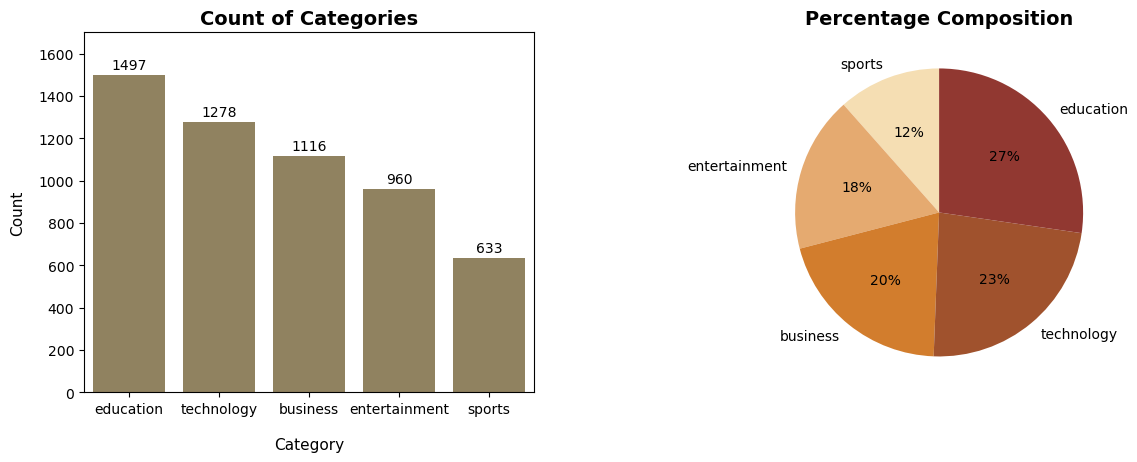

In [39]:
# Setting the canvas for the figures
fig1, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency (count) chart for train_df
order = train_df['Category'].value_counts().index
sns.countplot(x=train_df['Category'],palette=['#988558'], hue=train_df['Category'],
              order=order, ax=axes[0])
axes[0].set_xlabel('Category', labelpad=15, fontsize=11)
axes[0].set_ylabel('Count', labelpad=10, fontsize=11)
axes[0].set_title('Count of Categories', weight='bold', fontsize=14)
axes[0].set_ylim(0, 1700)
for index, data in enumerate(train_df['Category'].value_counts()):
    axes[0].text(x=index, y=data+29, s=f'{data}', ha='center')

# Plotting the pie chart showing the % composition of each category for the train_df
freq_train = train_df['Category'].value_counts().sort_values(ascending=True)
pie_colors = ['#F5DEB3', '#E5AA70', '#D27D2D', '#A0522D', '#913831']

axes[1].pie(freq_train, labels=freq_train.index, autopct='%1.0f%%', 
            colors=sns.color_palette(pie_colors, len(freq_train)),
            startangle=90)
axes[1].set_title('Percentage Composition', weight='bold', fontsize=14)

fig1.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.8, wspace=0.4)
plt.show()

The train dataset has a total of 5484 rows. The `education` category has the most data, accounting for 27% of the data, followed by `technology` at 23%. `business` accounts for 20%, `entertainment` with 18%, and `sports` with the least amount of data at 12%. This shows an imbalance in the training data, with the category with the most data having more than double the amount of data as the category with the least amount of data.

### *6.2. Visualising The Testing Data*

A visulisation code, similar to that of the training data, is applied to the test dataset to illuminate its composition and identify potential imbalances.

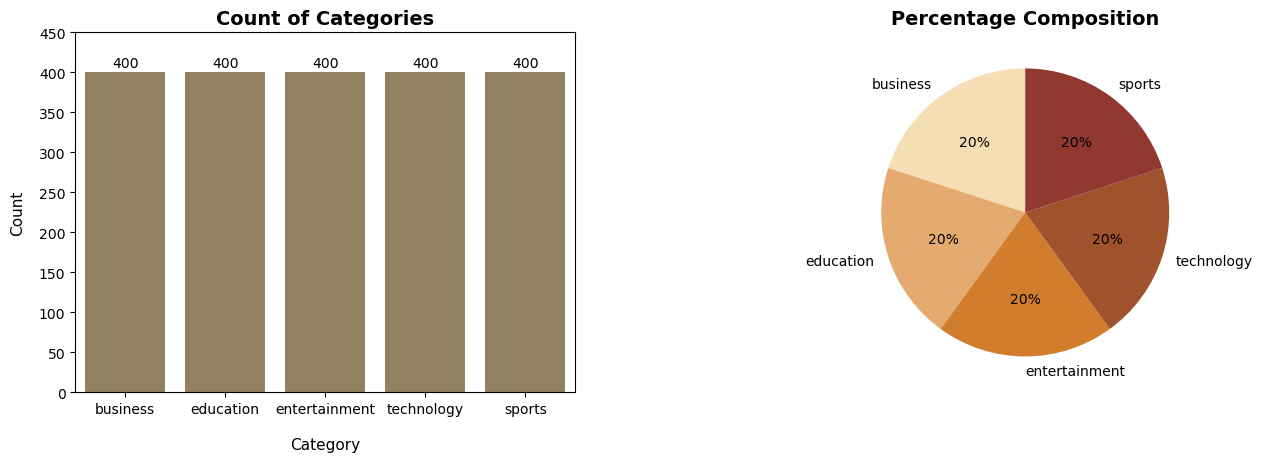

In [40]:
# Setting the canvas for the figures
fig2, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency (count) chart for the test_df
order = test_df['Category'].value_counts().index
sns.countplot(x=test_df['Category'],palette=['#988558'], hue=test_df['Category'],
              order=order, ax=axes[0])
axes[0].set_xlabel('Category', labelpad=15, fontsize=11)
axes[0].set_ylabel('Count', labelpad=10, fontsize=11)
axes[0].set_title('Count of Categories', weight='bold', fontsize=14)
axes[0].set_ylim(0, 450)
for index, data in enumerate(test_df['Category'].value_counts()):
    axes[0].text(x=index, y=data+7, s=f'{data}', ha='center')

# Plotting the pie chart showing the % composition of each category for the test_df
freq_test = test_df['Category'].value_counts().sort_values(ascending=True)

axes[1].pie(freq_test, labels=freq_test.index, autopct='%1.0f%%', 
            colors=sns.color_palette(pie_colors, len(freq_test)),
            startangle=90)
axes[1].set_title('Percentage Composition', weight='bold', fontsize=14)

fig2.subplots_adjust(left=0, right=1, bottom=0.2, top=0.8, wspace=0.4)
plt.show()

The testing dataset contains a total of 2000 data entries with an equal split of 20% of the data for each category. This dataset is balanced.

#### __Observations__

- The training dataset has an imbalance in the data by category. The category with the most data has more than double the data entries as the category with the least amount of data
- The testing dataset has no imbalance in the categorical data with each category accounting for 20% of the total data

### *6.3. Top 5 words for each category*

The code section below delves deeper into the text data and display a bar plot of the top 5 most frequent words associated with each article category in the training dataset. Through this analysis, we can expose key words that distinguish each category.


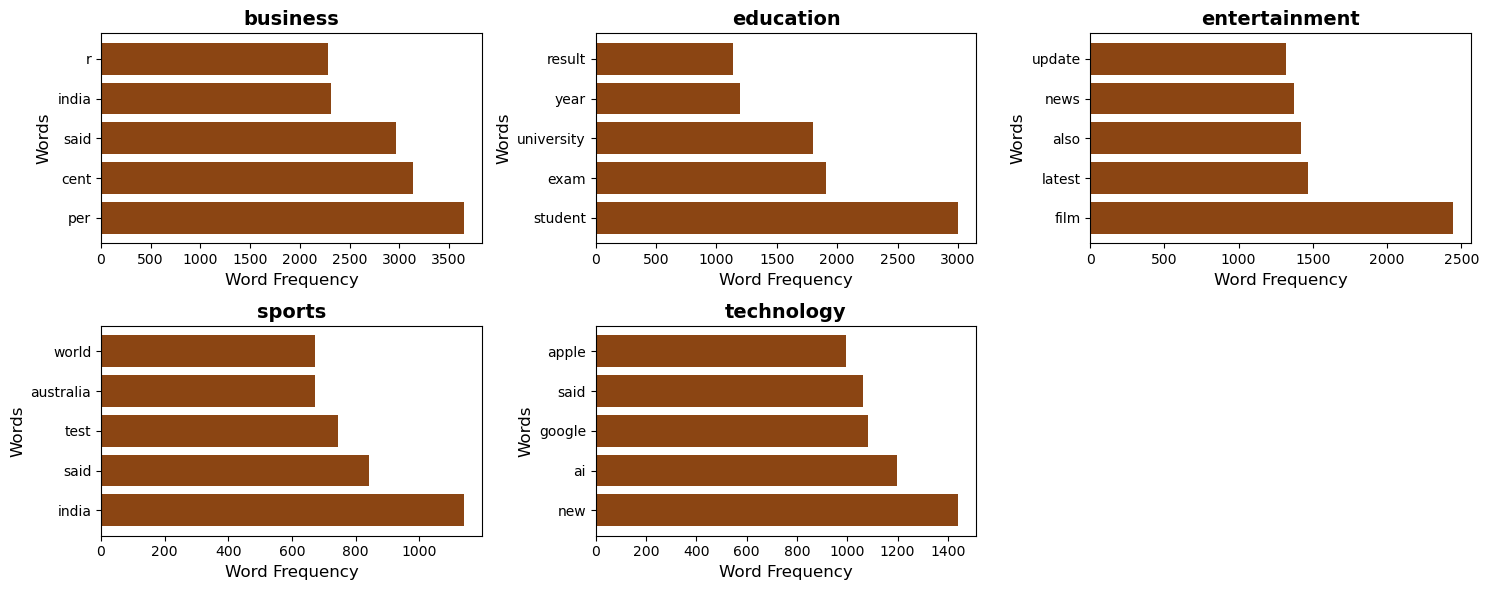

In [41]:
# columns to join before counting words in each category
token_cols = ["Headlines_Tokens", "Description_Tokens", "Content_Tokens"]

# Prepare an empty dictionary to store the top 5 words for each category
top_words_by_category = {}

for category, group in train_df.groupby('Category'):
    # Combine text for the category
    text = " ".join(group[token_cols].astype(str).agg(" ".join, axis=1))
    words = text.split()  # Tokenize the text
    word_counts = Counter(words)  # Count word occurrences
    top_words = word_counts.most_common(5)  # Get the top 5 words
   
    top_words_by_category[category] = top_words

# Calculate the number of rows needed (3 graphs per row)
n_categories = len(top_words_by_category)
n_rows = int(np.ceil(n_categories / 3))

# Create a subplot grid (3 graphs per line)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 3))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Plot the top 5 words for each category
for i, (category, top_words) in enumerate(top_words_by_category.items()):
    words, counts = zip(*top_words)  # Unzip words and their counts
    ax = axes[i]
    ax.barh(words, counts, color='#8B4513')  # Gold color
    ax.set_title(f'{category}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Word Frequency', fontsize=12)
    ax.set_ylabel('Words', fontsize=12)

# Turn off axes for extra subplots if there are fewer categories than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()  

#### __Observations__

- Words appearing the most in each graph are in reality associated with their respective category, for example words like 'apple','google', and 'ai' are 
in most cases associated with technology

- The same applies to the education bar graph, where the most common words such as 'student', 'exam', and 'university' are naturally associated with learning and academics.

## **7. Model Development**

In this section, 7 machine learning models were developed. Each model was developed using Scikit-learn's `GridSearchCV` for hyperparameter tuning. The data used to find the best hyperparameters for each model are `X_train` and `y_train` for training the models, and `X_validation` and `y_validation` for testing the models. Since the training and validation data has a class imbalance, Scikit-learn's `log_loss` function was used to select the models with the best hyperparameters. While `accuracy` may show the model's confidence, the `log_loss` function applies a heavy penalty when the model confidently makes misclassifications. This forces the model to be accurate in all classifcations. This is especially important when there is an imbalance in the data used to train the models, where classes with fewer training data may be less accurately classified than classes with the majority of the data. A `log_loss` value close to zero (`log_loss` ~ 0) means the model is confident and accurate in its predictions. A `log_loss` value of one or more (`log_loss` ~ 1 or more) means the model is poor in its predictions. Ideally, we want the `log_loss` of our models to be as close to zero as possible.

The models are detailed in the following sections. All models were developed with MLflow for recording the different hyperparameter combinations and their respective performances. The hyperparameters that were chosen to be included in the development were chosen based on their importance in improving their respective models. There were hardware limitations when training the models. The actually arguments (values) used in the hyperparameters were set such that there was balance between model performance and training runtime. 

Starting with setting up the mlflow environment:

In [868]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [869]:
print(mlflow.get_tracking_uri())

http://127.0.0.1:5000


Defining the functions to display the confusion matrix and decisions boundaries for each model.

In [871]:
def conf_matrix_visualizer(conf_matrix, model_name):
    """
    Plots the confusion matrix of a K-Nearest Neighbor model with 5 classes.

    Parameters:
    - confusion matrix
    """

    labels = {v: k for k, v in label_mapping.items()}
    
    class_labels = [labels[i] for i in range(5)]

    plt.figure(figsize=(8, 8))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    disp.plot(cmap="Blues", values_format="d")  # 'd' for integer values
    plt.xticks(rotation=90)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

In [872]:
def decision_boundaries_visualizer(model,
                                   model_name,
                                   X_train,
                                   X_validation,
                                   y_train,
                                   y_validation,
                                   feature_indices=[1, 2]):

    """
    Plot the decision boundary of a KNN model for two selected features.

    Parameters:
    - model: Trained KNN model
    - X_vailation: Feature matrix
    - y_validation: Target variable
    - feature_indices: Indices of the two features to plot
    """

    # Extract the two selected features
    X_fit = X_train[:, feature_indices]
    X_selected = X_validation[:, feature_indices]

    model.fit(X_fit, y_train)

    # Define the min and max for the two features
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

    # Create a meshgrid of points
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Predict on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Scatter the actual data points
    scatter = plt.scatter(
        X_selected[:, 0],
        X_selected[:, 1],
        c=y_validation,
        edgecolor='k',
        cmap=cmap_points
    )

    # Map numeric labels to class names
    labels = {v: k for k, v in label_mapping.items()}
    legend_labels = [labels[label] for label in np.unique(y_validation)]

    # Add legend with class names instead of numeric labels
    handles, labels = scatter.legend_elements()
    plt.legend(handles, legend_labels, title='Classes')
    
    # Label the plot
    plt.title(f'Decision Boundaries of the {model_name} Model')
    plt.xlabel(f'Feature {feature_indices[0]}')
    plt.ylabel(f'Feature {feature_indices[1]}')
    plt.show()

Getting important features in the models

In [874]:
def important_features(model):
    feature_importance = np.exp(model.feature_log_prob_)

    # Compute feature importance scores
    feature_importance = mutual_info_classif(X_train, y_train)
    
    # Get indices of sorted features
    sorted_indices = np.argsort(feature_importance)[::-1]  # Descending order
    
    # Get the top 10 and bottom 10 feature indices
    top_10_indices = sorted_indices[:10]
    bottom_10_indices = sorted_indices[-10:]
    
    # Create DataFrames
    most_important_features = pd.DataFrame({
        "Feature": [feature_names[i] for i in top_10_indices],  # Map indices to names
        "Importance": feature_importance[top_10_indices]
    })
    
    least_important_features = pd.DataFrame({
        "Feature": [feature_names[i] for i in bottom_10_indices],
        "Importance": feature_importance[bottom_10_indices]
    })

    return most_important_features, least_important_features

In [875]:
def nn_important_features(model):
    # Extract the absolute sum of weights for each feature
    feature_importance = np.sum(np.abs(model.coefs_[0]), axis=1)
    
    # Create a DataFrame with feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    
    # Get top 10 most important features
    most_important_features = importance_df.nlargest(10, 'Importance')
    
    # Get bottom 10 least important features
    least_important_features = importance_df.nsmallest(10, 'Importance')

    return most_important_features, least_important_features

In [876]:
def svm_important_features(model):
   
    # Extract feature importance from coef_ (Multiclass: multiple rows)
    coefs = model.coef_
    
    # Aggregate importance: Use mean or max of absolute values across classes
    feature_importance = np.mean(np.abs(coefs), axis=0)  # Mean absolute value per feature
    
    # Create a DataFrame with feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    
    # Get top 10 most important features
    most_important_features = importance_df.nlargest(10, 'Importance')
    
    # Get bottom 10 least important features
    least_important_features = importance_df.nsmallest(10, 'Importance')

    return most_important_features, least_important_features

Creating storage for the evaluation predictions

In [878]:
y_test_pred = {}
y_test_pred_proba = {}

### *7.1. K-Nearest Neighbor*

Setting the MLflow environment for the K-Nearest Neighbor (KNN) model for hyperparameter tuning and selection.

In [881]:
knn_experiment_name = 'KNN Model'
#experiment_id = mlflow.create_experiment(knn_experiment_name)
mlflow.set_experiment(knn_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/254253176734403941', creation_time=1737828671281, experiment_id='254253176734403941', last_update_time=1737828671281, lifecycle_stage='active', name='KNN Model', tags={}>

Developing the model and tracking the metrics on mlflow.

#### *7.1.1. Developing the model and tracking the metrics on mlflow.*

The `KNeighborsClassifier` from the `neighbors` module in Scikit-learn library works differently from the other models developed in this notebook. It does not train and learn from the training data like other models. Instead, it stores the data and  classifies new data by comparing it to stored examples. This model generally takes long to develop especially for large datasets.

In [885]:
def develop_knn(X_train, X_validation, y_train, y_validation):
    """
    - Trains a K-Nearest Neighbor model using a GridSearchCV for
    hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    knn_model = KNeighborsClassifier()
    # Define parameter grid
    param_grid = {
        'n_neighbors': [30, 20],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Set up the scorer for the GridSearchCV
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
    
    # Set up GridSearchCV
    knn_grid_search = GridSearchCV(
        knn_model,
        param_grid,
        cv=2,
        scoring=scorer,
        refit='log_loss',
        return_train_score=True,
        n_jobs=-1,
        verbose=1
    )
    
    # Start MLflow run
    with mlflow.start_run(run_name='KNN GridSearchCV Try 8'):
        # Fit the model
        knn_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = knn_grid_search.cv_results_
        for i in range(len(results['params'])):
            params = results['params'][i]
            
            # Predict on the validation set for each parameter combination
            model = knn_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            knn_y_pred = model.predict(X_validation)
            knn_y_pred_proba = model.predict_proba(X_validation)
            
            # Generate classification report
            report = classification_report(y_validation, knn_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, knn_y_pred_proba)
            
            # Log metrics and parameters for each parameter combination
            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)
                
                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)
    
        # Log the best model
        best_model = knn_grid_search.best_estimator_
        best_params = knn_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)
        
        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)
        
        # Log the best model
        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', knn_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -knn_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value

Getting the best KNN model (`best_knn_model`) along with its confusion matrix (`knn_conf_matrix`) and classification report (`knn_class_report`) based on the best log_loss value.

In [887]:
best_knn_model, knn_conf_matrix, knn_class_report, knn_log_loss = develop_knn(X_train,
                                                                              X_validation,
                                                                              y_train,
                                                                              y_validation
                                                                             )
y_test_pred['k-Nearest Neighbor'] = best_knn_model.predict(X_test_set)
y_test_pred_proba['k-Nearest Neighbor'] = best_knn_model.predict_proba(X_test_set)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/20186c441106458984eadbf235fd6dfe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254253176734403941
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/f75993dff3f84a64bfde7fc1fe7d5a18
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254253176734403941
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/22bb364b8d31465ea20bb1929a4d6648
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254253176734403941
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/f354001949aa47d6a3f10626ac0a9273
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254253176734403941
🏃 View run Run 5 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/6d79514936c64ea599450c47f2a1ab22
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2542

2025/02/05 17:51:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN GridSearchCV Try 8 at: http://127.0.0.1:5000/#/experiments/254253176734403941/runs/72bd417f635e405caaa24b04f4db443b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254253176734403941
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
Test Set Accuracy (Best Model): 0.9726526891522334
Best cross validation log_loss (train): 0.19379423120257172
Best log loss (validation): 0.12754628812478816


The training cross validation (CV) `log_loss` is good, at 0.19379, with an accuracy of 0.97083. What's better is that the `log_loss` value slightly improves on the validation testing data, going down to 0.12755. This means that the model generalised slightly better to the testing data which was unseen to the model before testing. The `log_loss` values themselves are decently close to zero, meaning the model is likely not guessing its predictions.

#### *7.1.2. Visualizing the confusion matrix for the best KNN model*

<Figure size 800x800 with 0 Axes>

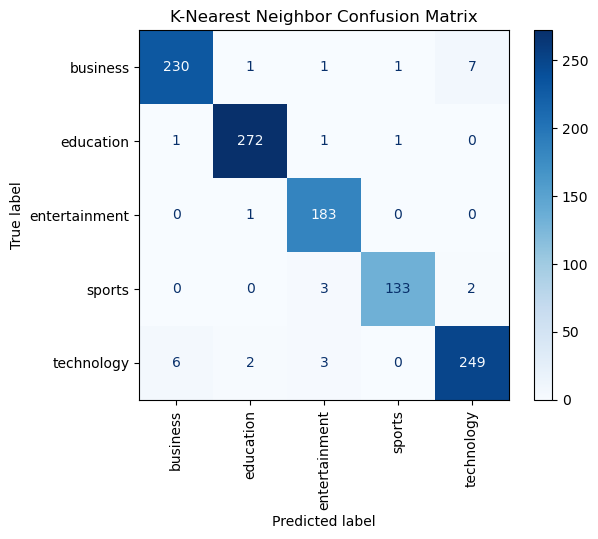

In [890]:
conf_matrix_visualizer(knn_conf_matrix, 'K-Nearest Neighbor')

The confusion matrix shows the number of classifications in the validation (testing) data that were correctly predicted by the model. The correct predictions for each class are provided diagonally, where the class in the `True label` (vertical axis) meets the class in the `Predicted label` (horizontal axis). The number of wrong predictions appear in the rest of the cells. In the case of this KNN model, the model had a decent performance, correctly predicting most of the data. However, it had some notable incorrect predictions, particularly between the `business` and `technology` classes which have the highest misclassifications.

#### *7.1.3. Visualizing the decision boundaries for the KNN model*

Visualization is only possible between two features at a time. Change the input `feature_indices` to visualize between the selected features.

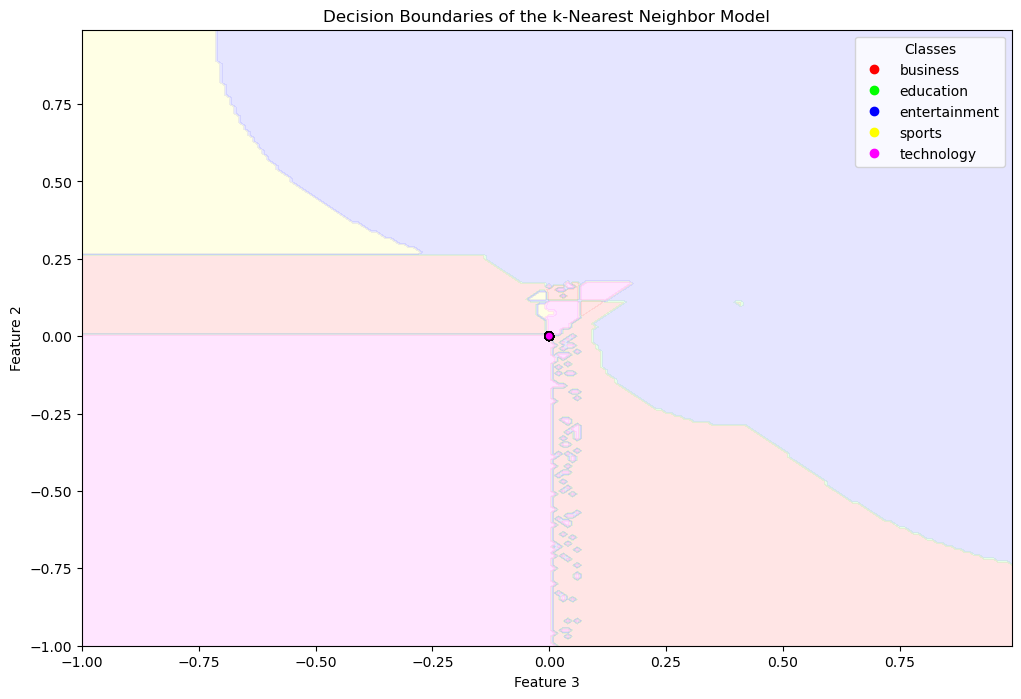

In [894]:
feature_indices = [3, 2] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_knn_model,
                               'k-Nearest Neighbor',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

Depending on the input in the `feature_indices`, the displayed graph should show a colour-shaded canvas with each colour representing where the model would predict each class to be (i.e. the model's prediction probability for each class for the selected features). The dots are datapoints of the actual classes between the two selected features. If the colour of the dot does not match the colour of its background, then the model misclassified this datapoint. If the colours match between the datapoints and the background, then the model classified these datapoints correctly. This is the case for all decision boundary visuals of the other models in this notebook, so, bare this in mind when looking at these visuals.

### *7.2. Naive Bayes*

Setting up the mlflow environment for the Naive Bayes (NB) model

In [898]:
nb_experiment_name = 'Naive Bayes Model'
#experiment_id = mlflow.create_experiment(nb_experiment_name)
mlflow.set_experiment(nb_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/772113178670095727', creation_time=1737897353154, experiment_id='772113178670095727', last_update_time=1737897353154, lifecycle_stage='active', name='Naive Bayes Model', tags={}>

#### *7.2.1. Developing the model and tracking the metrics on mlflow.*

As this is a classification problem, the `MultinomialNB` model from the `naive_bayes` module in the Scikit-learn library was used in this sub-section.

In [901]:
def develop_nb(X_train, X_validation, y_train, y_validation):
    """
    - Trains a Multinomial Naive Bayes model using a GridSearchCV for
    hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    # Define model
    nb_model = MultinomialNB()

    # Define parameter grid
    num_classes = len(np.unique(y_train))
    param_grid = {
        'alpha': [0.1, 1.0, 5, 10],
        'fit_prior': [True, False],  
        'class_prior': [
            [1/num_classes] * num_classes,
            [0.1, 0.2, 0.3, 0.2, 0.2],
            [0.1, 0.1, 0.2, 0.4, 0.2],
            [0.3, 0.3, 0.05, 0.2, 0.15],
            [0.25, 0.25, 0.25, 0.15, 0.1],
            [0.5, 0.1, 0.1, 0.1, 0.2],
            None
        ]
    }

    # Define scorer
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Define GridSearch
    nb_grid_search = GridSearchCV(
        nb_model,
        param_grid,
        scoring=scorer,
        refit='log_loss',
        cv=3,
        return_train_score=True,
        n_jobs=-1,
        verbose=1
    )

    # Start mlflow run
    with mlflow.start_run(run_name="NB GridSearchCV Try 6"):

        # Fit the grid search model
        nb_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = nb_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = nb_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            nb_y_pred = model.predict(X_validation)
            nb_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, nb_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, nb_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)


        # Log the best model
        best_model = nb_grid_search.best_estimator_
        best_params = nb_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', nb_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -nb_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value


Getting the best NB model (`best_nb_model`) along with its confusion matrix (`nb_conf_matrix`) and classification report (`nb_class_report`) based on the best log_loss value.

In [903]:
best_nb_model, nb_conf_matrix, nb_class_report, nb_log_loss = develop_nb(X_train,
                                                                         X_validation,
                                                                         y_train,
                                                                         y_validation
                                                                        )
y_test_pred['Naive Bayes'] = best_nb_model.predict(X_test_set)
y_test_pred_proba['Naive Bayes'] = best_nb_model.predict_proba(X_test_set)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/4bfb55493c5d447483a9bb7525eb55e6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/772113178670095727
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/1f516b706e3b405786b309481529cda8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/772113178670095727
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/adc031cab63341c282d9277983a26909
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/772113178670095727
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/916991bd6e514d81bbc333244b4c028d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/772113178670095727
🏃 View run Run 5 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/a768990525b1433a88cd837873f6cc13
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/77

2025/02/05 17:52:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run NB GridSearchCV Try 6 at: http://127.0.0.1:5000/#/experiments/772113178670095727/runs/22441aa3fb9842659080ddbc9fb239b1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/772113178670095727
Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Test Set Accuracy (Best Model): 0.9863263445761167
Best cross validation log_loss (train): 0.06827887699097222
Best log loss (validation): 0.05147732196335981


In [904]:
nb_most_important_features, nb_least_important_features = important_features(best_nb_model)

The CV `log_loss` is in the ideal range for this value at 0.06828, and gets better in the validation testing data down to 0.05147. This means the model generalised very well to unseen data, making it highly confident in its predicting abilities. A larger unseen data is still necessary to learn more about the generalisability of the model with hopes that the `log_loss` value will remain in the same range as the ones in the training.

#### *7.2.2. Visualizing the confusion matrix for the best NB model*

<Figure size 800x800 with 0 Axes>

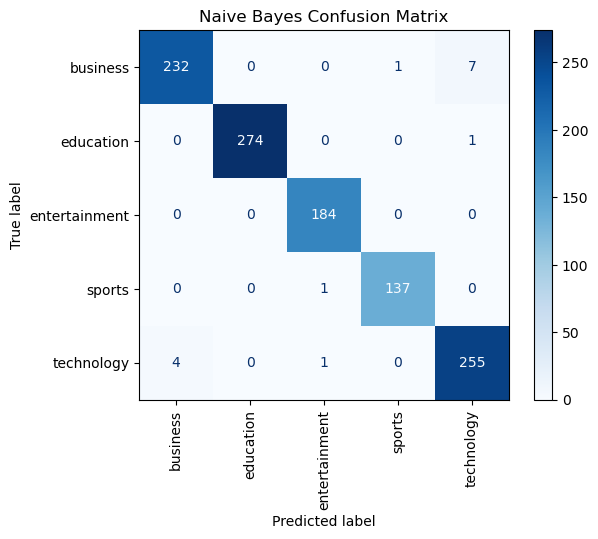

In [907]:
conf_matrix_visualizer(nb_conf_matrix, 'Naive Bayes')

Even though the model is more accurate and confident in its predictions, it still has a similar weakness to the KNN model in that it struggles with classifying between the `business` and `technology` data. Apart from that, it seems to have performed quite well.

#### *7.2.3. Visualizing the decision boundaries for the NB model*

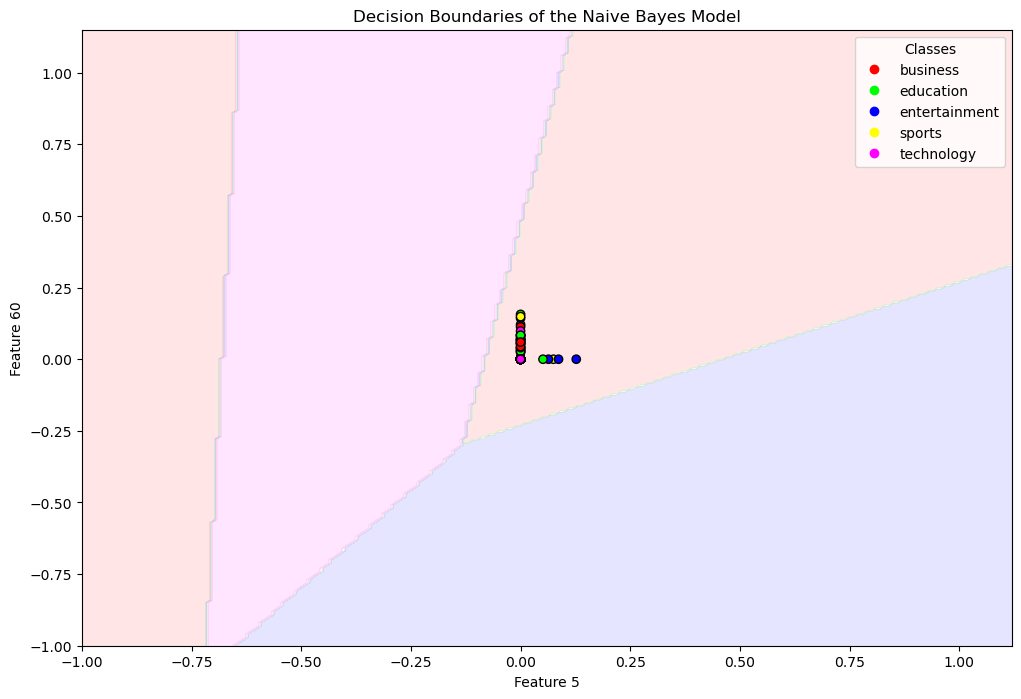

In [910]:
feature_indices = [5, 60] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_nb_model,
                               'Naive Bayes',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### *7.3. Neural Networks*

Setting up the mlflow environment for the Neural Networks (NN) model

In [913]:
nn_experiment_name = 'Neural Network Model'
#experiment_id = mlflow.create_experiment(nn_experiment_name)
mlflow.set_experiment(nn_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/332257414483312577', creation_time=1738164141406, experiment_id='332257414483312577', last_update_time=1738164141406, lifecycle_stage='active', name='Neural Network Model', tags={}>

#### *7.3.1. Developing the model and tracking the metrics on mlflow*

An `MLPClassifier` from the `neural_network` module in Scikit-learn library was used to develop the NN model. The `Sequential` model from the `keras` module in TensorFlow library does not work seemlessly with Scikit-learn packages like the `GridSearchCV` used for hyperparameter tuning. Often times, a wrapper of some sort is required to compatibilize these packages from different libraries. Sometimes these wrappers may not be updated as often as required and this may cause unnecessary errors. Since the majority of the packages used in this notebook are from the Scikit-learn library, the neural network model was also selected from the Scikit-learn `neural_network` module.

In [916]:
def develop_nn(X_train, X_validation, y_train, y_validation):
    """
    - Trains a Neural Network model using a GridSearchCV for hyperparameter tuning.
    - Logs the metrics of model onto an MLflow server.
    
    Parameters:
    - X_train - Training features
    - y_train - Training target variable
    - X_validation - Testing features
    - y_validation - Testing variables

    Returns:
    - best_model - Model that performed the best
    - conf_matrix - The confusion matrix of the best model
    - best_report - The classification report of the best model
    """

    # Initialize MLPClassifier
    mlp = MLPClassifier(solver='adam', random_state=42)

    # Define hyperparameter grid for GridSearchCV
    param_grid = {
        'hidden_layer_sizes': [(10, 10), (20, 20), (10, 20)], 
        'activation': ['relu'],  
        'alpha': [0.0001, 0.001, 0.01], 
        'learning_rate': ['constant'], 
        'batch_size': [32], 
        'max_iter': [1000, 20], 
    }

    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
    
    # Set up GridSearchCV with log_loss as scoring
    nn_grid_search = GridSearchCV(
        estimator=mlp,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        refit='log_loss',
        return_train_score=True,
        scoring=scorer,
        verbose=1
        )

    # Start mlflow run
    with mlflow.start_run(run_name="NN GridSearchCV Try 3"):

        # Fit the grid search model
        nn_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = nn_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = nn_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            nn_y_pred = model.predict(X_validation)
            nn_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, nn_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, nn_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)


        # Log the best model
        best_model = nn_grid_search.best_estimator_
        best_params = nn_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
    
    # Output results
    print('Best Parameters:', nn_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -nn_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value
    

Getting the best NN model (`best_nn_model`) along with its confusion matrix (`nn_conf_matrix`) and classification report (`nn_class_report`) based on the best log_loss value.

In [918]:
best_nn_model, nn_conf_matrix, nn_class_report, nn_log_loss = develop_nn(X_train, 
                                                                         X_validation, 
                                                                         y_train, 
                                                                         y_validation
                                                                        )
y_test_pred['Neural Networks'] = best_nn_model.predict(X_test_set)
y_test_pred_proba['Neural Networks'] = best_nn_model.predict_proba(X_test_set)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/9661c36c3a754b49a83deed984254620
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332257414483312577
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/9bb5af0dff6a461eb7f22ce8b464f2ff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332257414483312577
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/f2d327858e194a23bc54febacc013726
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332257414483312577
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/af6fd0376715402790d17fb22131cae1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332257414483312577
🏃 View run Run 5 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/015ce16ce53c4662b67599de6754e0db
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332

2025/02/05 18:02:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run NN GridSearchCV Try 3 at: http://127.0.0.1:5000/#/experiments/332257414483312577/runs/a63273a0eebe4641b0e63adaab6dfdbd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/332257414483312577
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 20}
Test Set Accuracy (Best Model): 0.9881494986326345
Best cross validation log_loss (train): 0.05478333798580581
Best log loss (validation): 0.045016996120266585


In [919]:
nn_most_important_features, nn_least_important_features = nn_important_features(best_nn_model)

Similarly to the NB model, the CV `log_loss` of the NN model looks healthy at 0.05478 and gets slightly better in the validation testing with a value of 0.04502.

#### *7.3.2. Visualizing the confusion matrix for the best NN model*

<Figure size 800x800 with 0 Axes>

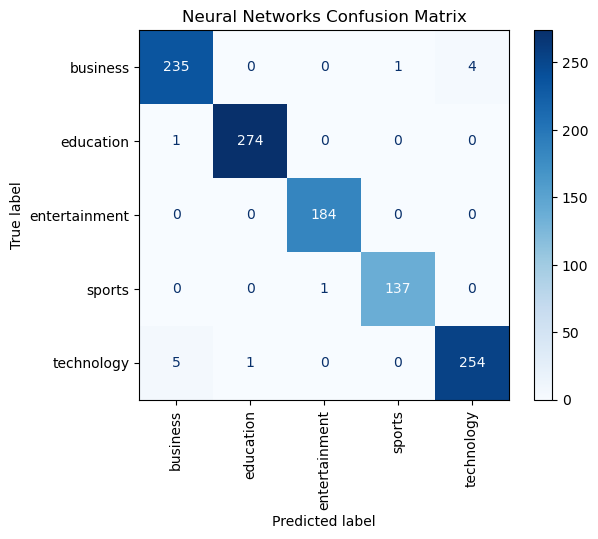

In [922]:
conf_matrix_visualizer(nn_conf_matrix, 'Neural Networks')

The trend of having more misclassified data between the `business` and `technology` classes continues in this model. The good news is that this model has a lower number of these misclassifications compared to the KNN and NB models. Overall, the model performed well which was expected given the low `log_loss` values from the training.

#### *7.3.3. Visualizing the decision boundaries for the NN model*

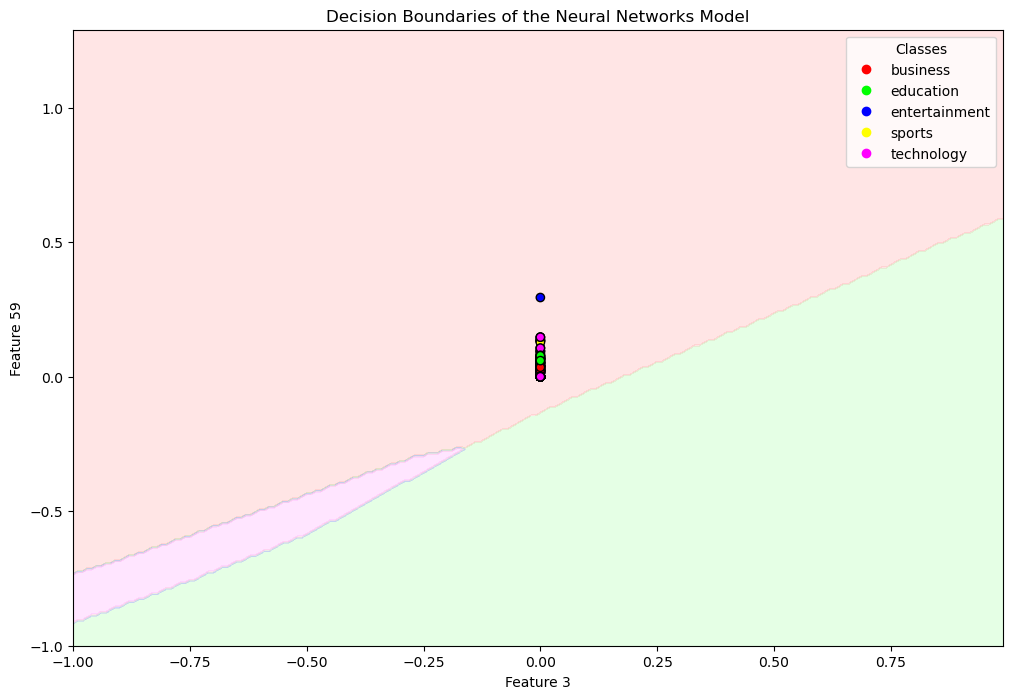

In [925]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_nn_model,
                               'Neural Networks',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### *7.4. Logistic Regression*

`Logistic Regression` is a statistical method used for binary and multi-class classification tasks. In `Scikit-learn`, the `LogisticRegression` model from the `linear_model` module provides a robust and efficient implementation of this algorithm.

Multi-class classification, Scikit-learn supports two strategies: One-vs-Rest (OvR) and Multinomial. The One-vs-Rest (OvR) approach, also known as One-vs-All (OvA) - which is supported through the `multi_class`='ovr' parameter, is a widely used technique where a separate binary classifier is trained for each class.

Scikit-learn's optimized `solvers` (such as lbfgs, saga, and liblinear), logistic regression in an OvR setting can be efficiently trained on both small and large datasets. 

Setting up the mlflow environment for the Logistic Regression (LR) model

In [929]:
lr_experiment_name = 'Logistic Regression Model'
#experiment_id = mlflow.create_experiment(lr_experiment_name)
mlflow.set_experiment(lr_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/278700037693718280', creation_time=1738577433627, experiment_id='278700037693718280', last_update_time=1738577433627, lifecycle_stage='active', name='Logistic Regression Model', tags={}>

#### *7.4.1 Grid search method and training the OvR logistic regression model*

In [931]:
def develop_lr(X_train, X_validation, y_train, y_validation):

    lr = LogisticRegression()

    param_grid = {
        'solver': ['lbfgs', 'saga'],  # Solvers compatible with OvR
        'C': [0.1, 1.0, 10],          # Regularization strength
        'max_iter': [500, 1000],      # Maximum iterations
        'multi_class': ['ovr']        # Explicitly specify OvR
    }

    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Set up GridSearchCV
    lr_grid_search = GridSearchCV(
        estimator=lr,
        param_grid=param_grid,
        cv=3,
        scoring=scorer,  # Optimize for accuracy (or use another metric)
        n_jobs=-1,           # Use all available cores
        verbose=1            # Show progress output
    )

    # Start mlflow run
    with mlflow.start_run(run_name="LR GridSearchCV Try 1"):

        # Fit the grid search model
        lr_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = lr_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = lr_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            lr_y_pred = model.predict(X_validation)
            lr_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, lr_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, lr_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)

    

        best_model = lr_grid_search.best_estimator_
        best_params = lr_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
        

    print('Best Parameters:', lr_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -lr_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value


In [932]:
best_lr_model, lr_conf_matrix, lr_class_report, lr_log_loss = develop_lr(X_train,
                                                                         X_validation,
                                                                         y_train,
                                                                         y_validation
                                                                        )
y_test_pred['Logistic Regression'] = best_lr_model.predict(X_test_set)
y_test_pred_proba['Logistic Regression'] = best_lr_model.predict_proba(X_test_set)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/2f7a4674e714496a9fcbc7ddb4b79acb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278700037693718280
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/8ecfd277ba3e435798c990b10fc92461
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278700037693718280
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/0795c2b61b25490fb7c5597c3afaae88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278700037693718280
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/c01bd5b73a334f36b633b9cba2ddad73
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278700037693718280
🏃 View run Run 5 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/b45735b9db744aceae3cb7808f560a81
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278

2025/02/05 18:09:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR GridSearchCV Try 1 at: http://127.0.0.1:5000/#/experiments/278700037693718280/runs/a32dedb06d6d4f3ebe12ac5475a975cd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/278700037693718280
Best Parameters: {'C': 10, 'max_iter': 500, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Test Set Accuracy (Best Model): 0.9863263445761167
Best cross validation log_loss (train): 0.10628438283580517
Best log loss (validation): 0.08862829464092613


The `Logistic Regression` (OvR) model was optimized using `GridSearchCV`, resulting in a total of 36 model fits. The best-performing model was identified with the following hyperparameters - `C`: 10, `max_iter`: 500, `multi_class`: 'ovr', `solver`: 'lbfgs'.

The model achieved a test set accuracy of 0.9863 (98.63%), indicating strong classification performance. 
The best cross-validation `log_loss` (training) was 0.1063, while the best validation `log_loss` was 0.0886. These low log loss values suggest that the model produces well-calibrated probability estimates, reinforcing its reliability.

#### *7.4.2 Visualising the Confusion Matrix of the best Logistic Regression model*

<Figure size 800x800 with 0 Axes>

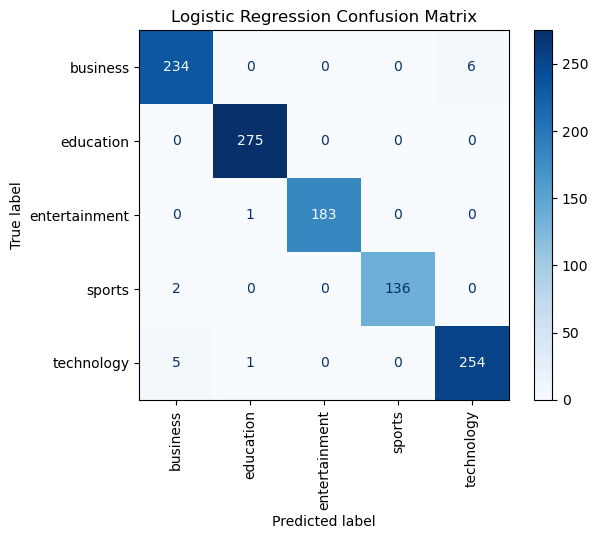

In [935]:
conf_matrix_visualizer(lr_conf_matrix, 'Logistic Regression')

The `confusion_matrix` illustrates the performance of the `Logistic Regression` (OvR) model across different classes. The `ConfusionMatrixDisplay` from `sk.learn` have diagonal values represent correctly classified instances, while off-diagonal values indicate misclassifications.

 The model demonstrates strong overall accuracy, because majority of predictions falling along the diagonal.
 - Class 0 had 234 correct predictions but misclassified 6 instances as Class 4. 
 - Class 1 was classified perfectly with 275 correct predictions. 
 - Class 2 had 183 correct predictions with only 1 misclassified as Class 1. 
 - Class 3 had 136 correct predictions with 2 misclassified as Class 0. 
 - Class 4 had 254 correct predictions but 5 were misclassified as Class 0 and 1 as Class 1.

These results indicate that the model has very high precision and recall, with minimal misclassification. Overall, the model performs exceptionally well, with only minor areas for potential improvement.

#### *7.4.3 Visualising the decision boundaries the Logistic Regression model*

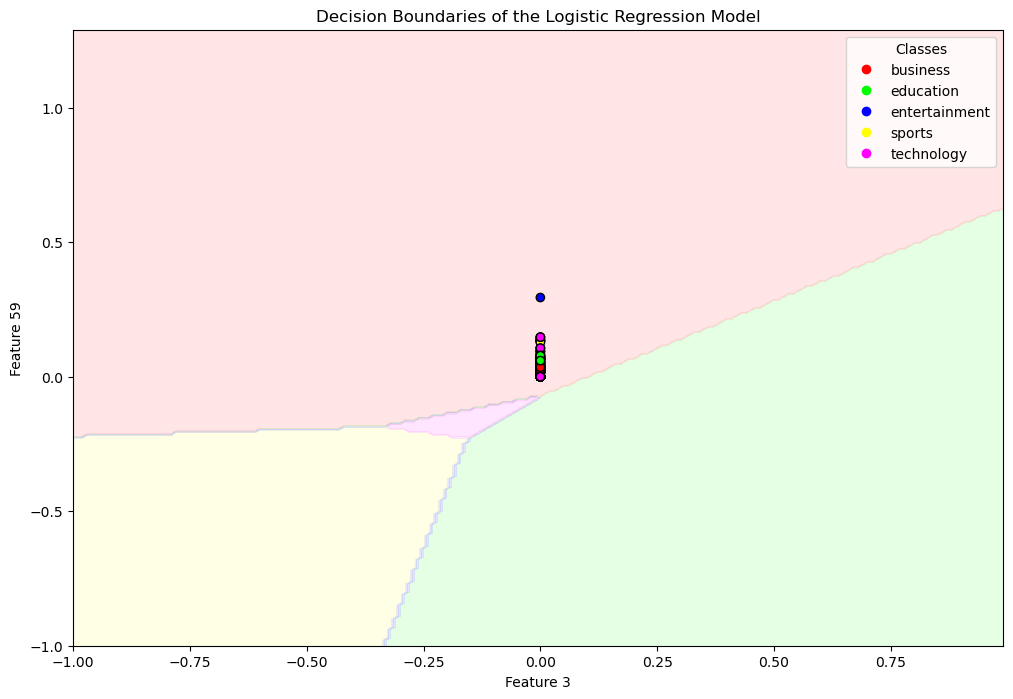

In [938]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_lr_model,
                               'Logistic Regression',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### *7.5. Random Forest Classifier*

A `RandomForestClassifier` from the `ensemble` module in Scikit-learn was used for classification. This model is an ensemble learning method that constructs multiple decision trees and merges their results to improve accuracy and reduce overfitting. It is robust to noise and performs well on high-dimensional data.

Setting up the mlflow environment for the Random Forest Classifier (RF) model

In [942]:
rf_experiment_name = 'Random Forest Model'
#experiment_id = mlflow.create_experiment(rf_experiment_name)
mlflow.set_experiment(rf_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/918274607726366405', creation_time=1738577774036, experiment_id='918274607726366405', last_update_time=1738577774036, lifecycle_stage='active', name='Random Forest Model', tags={}>

##### *7.5.1 Developing the model and tracking the metrics on MLflow*

In [944]:
def develop_rf(X_train, X_validation, y_train, y_validation):

    rf = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [1000, 200, 500],  # Number of trees
        'max_depth': [None, 10, 20]  # Depth of trees
    }
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Set up GridSearchCV
    rf_grid_search = GridSearchCV(rf,
                                  param_grid,
                                  cv=3,
                                  scoring=scorer,
                                  n_jobs=-1,
                                  verbose=1
                                 )

    # Start mlflow run
    with mlflow.start_run(run_name="RF GridSearchCV Try 1"):

        # Fit the grid search model
        rf_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = rf_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = rf_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            rf_y_pred = model.predict(X_validation)
            rf_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, rf_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, rf_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)

    

        best_model = rf_grid_search.best_estimator_
        best_params = rf_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

         # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')
    

    print('Best Parameters:', rf_grid_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -rf_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value


In [945]:
best_rf_model, rf_conf_matrix, rf_class_report, rf_log_loss = develop_rf(X_train,
                                                                         X_validation,
                                                                         y_train,
                                                                         y_validation
                                                                        )
y_test_pred['Random Forest Classifier'] = best_rf_model.predict(X_test_set)
y_test_pred_proba['Random Forest Classifier'] = best_rf_model.predict_proba(X_test_set)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/df8facd83cb04bd8a0aedae1d691e968
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/918274607726366405
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/faed499fa0e5470e9881ee6ef48347b6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/918274607726366405
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/fd65c74caf974593aa0942ab87a4dbc8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/918274607726366405
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/442b009db22641b59583181461362ca4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/918274607726366405
🏃 View run Run 5 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/fe588d26da33494d967a856b741f30db
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/9182

2025/02/05 18:15:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF GridSearchCV Try 1 at: http://127.0.0.1:5000/#/experiments/918274607726366405/runs/3174539e6810417ebf9135bf4a8c144c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/918274607726366405
Best Parameters: {'max_depth': None, 'n_estimators': 1000}
Test Set Accuracy (Best Model): 0.9808568824065633
Best cross validation log_loss (train): 0.2569763608315028
Best log loss (validation): 0.241025024128869


#### *7.5.2 Visualizing the Confusion Matrix of the best Random Forest Classifier*

Visualizing the confusion matrix for the Random Forest Classifier to analyze prediction performance.


<Figure size 800x800 with 0 Axes>

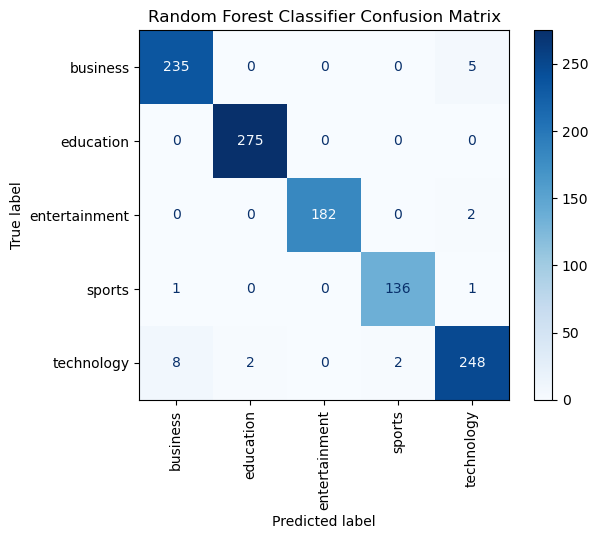

In [948]:
conf_matrix_visualizer(rf_conf_matrix, 'Random Forest Classifier')

#### *7.5.3 Visualizing the decision boundaries the Random Forest Classifier*

Visualizing decision boundaries for the Random Forest Classifier using selected feature indices.

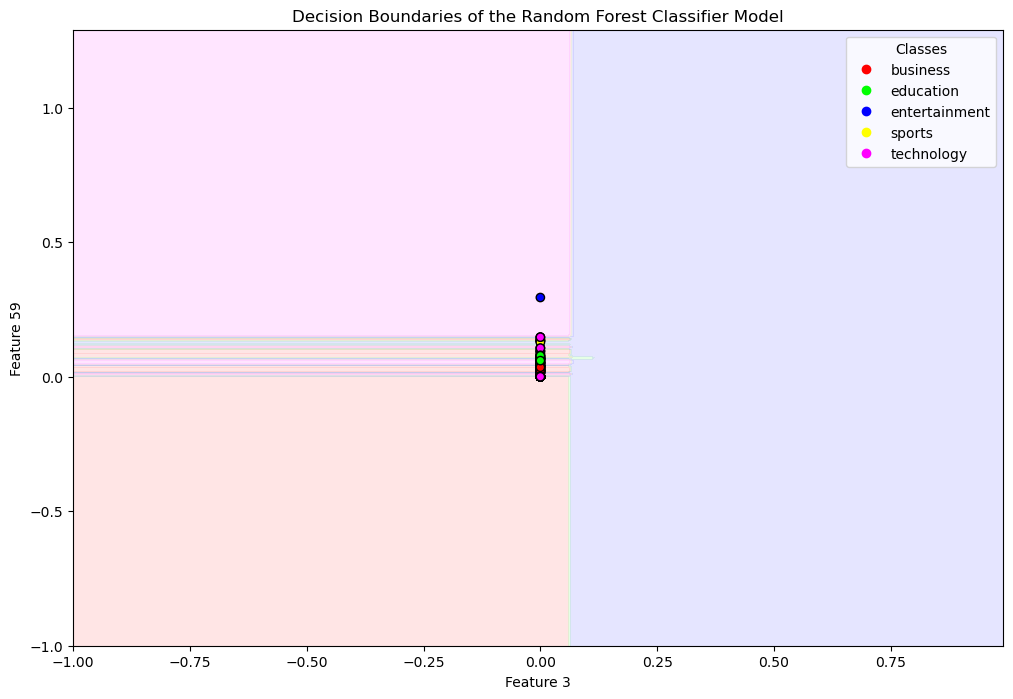

In [951]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_rf_model,
                               'Random Forest Classifier',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### *7.6. AdaBoost Classifier*

The **AdaBoost Classifier** (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers (typically decision trees) to create a strong classifier. It gives more weight to misclassified samples to improve performance in the next iteration. The key hyperparameters tuned include `n_estimators` (number of weak classifiers) and `learning_rate` (controls the contribution of each weak classifier).

Setting up the mlflow environment for the AdaBoost Classifier (ADAB) model

In [955]:
adab_experiment_name = 'AdaBoost Model'
#experiment_id = mlflow.create_experiment(adab_experiment_name)
mlflow.set_experiment(adab_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/526128967292994954', creation_time=1738578125447, experiment_id='526128967292994954', last_update_time=1738578125447, lifecycle_stage='active', name='AdaBoost Model', tags={}>

#### *7.6.1 Developing the model and tracking the metrics on MLflow*

In [957]:
def develop_adaboost(X_train, X_validation, y_train, y_validation):

    # Base Estimator: Decision Tree Stump (with tunable max_depth)
    base_estimator = DecisionTreeClassifier(random_state=42)

    # Define AdaBoost Model
    ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

    # Define Hyperparameter Grid (including max_depth for tuning)
    ada_params = {
        'n_estimators': [50, 100],  # Number of weak classifiers
        'learning_rate': [0.01],
        'algorithm': ['SAMME.R'],
        'estimator__max_depth': [3, 5]  # Add max_depth values to tune
    }

    # Use Log Loss as Scoring Metric
    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Perform Grid Search
    ada_grid_search = GridSearchCV(
        estimator=ada_model,
        param_grid=ada_params,
        cv=2,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )

    # Start mlflow run
    with mlflow.start_run(run_name="ADAB GridSearchCV Try 1"):

        # Fit the GridSearchCV
        ada_grid_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = ada_grid_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = ada_grid_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            adab_y_pred = model.predict(X_validation)
            adab_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, adab_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, adab_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)
    

        # Get Best Model and Predictions
        best_model = ada_grid_search.best_estimator_
        best_params = ada_grid_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
    
        # Compute Evaluation Metrics
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)


         # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')

    # Print Results
    print('Best Parameters:', best_params)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross-validation log_loss (train):', -ada_grid_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Return Best Model and Metrics
    return best_model, conf_matrix, best_report, best_log_loss_value


In [958]:
best_adab_model, adab_conf_matrix, adab_class_report, adab_log_loss = develop_adaboost(X_train,
                                                                                     X_validation,
                                                                                     y_train,
                                                                                     y_validation
                                                                                     )
y_test_pred['AdaBoost Classifier'] = best_adab_model.predict(X_test_set)
y_test_pred_proba['AdaBoost Classifier'] = best_adab_model.predict_proba(X_test_set)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/526128967292994954/runs/59cb86e1bd7f4a37887a45c0099050bd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526128967292994954
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/526128967292994954/runs/907a75824567497fae68ef3400e8b1eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526128967292994954
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/526128967292994954/runs/2423e513f7f64d4ca039bb7bcbbc6d57
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526128967292994954
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/526128967292994954/runs/3b93e087654a4c3d98a150632a7ebcbd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526128967292994954


2025/02/05 18:28:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ADAB GridSearchCV Try 1 at: http://127.0.0.1:5000/#/experiments/526128967292994954/runs/8068c35ffc2a46e2b31bf7bde93932d9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526128967292994954
Best Parameters: {'algorithm': 'SAMME.R', 'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 100}
Test Set Accuracy (Best Model): 0.9389243391066545
Best cross-validation log_loss (train): 0.2210653094931168
Best log loss (validation): 0.24645703612604994


#### *7.6.2 Visualizing the Confusion Matrix of the best AdaBoost Classifier*

<Figure size 800x800 with 0 Axes>

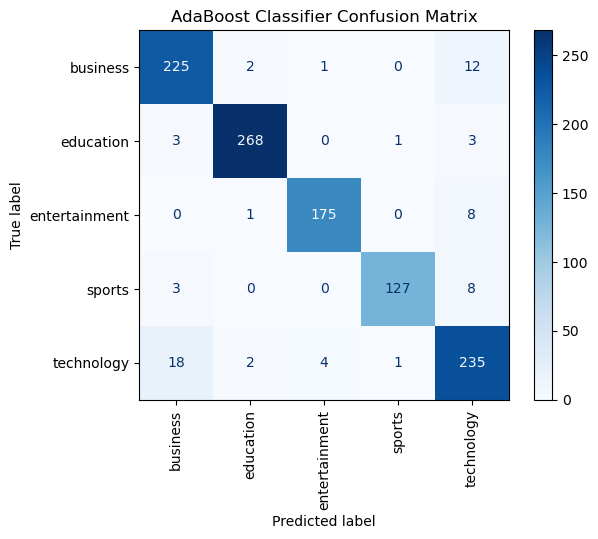

In [960]:
conf_matrix_visualizer(adab_conf_matrix, 'AdaBoost Classifier')

#### *7.6.3 Visualizing the decision boundaries of the AdaBoost Classifier*

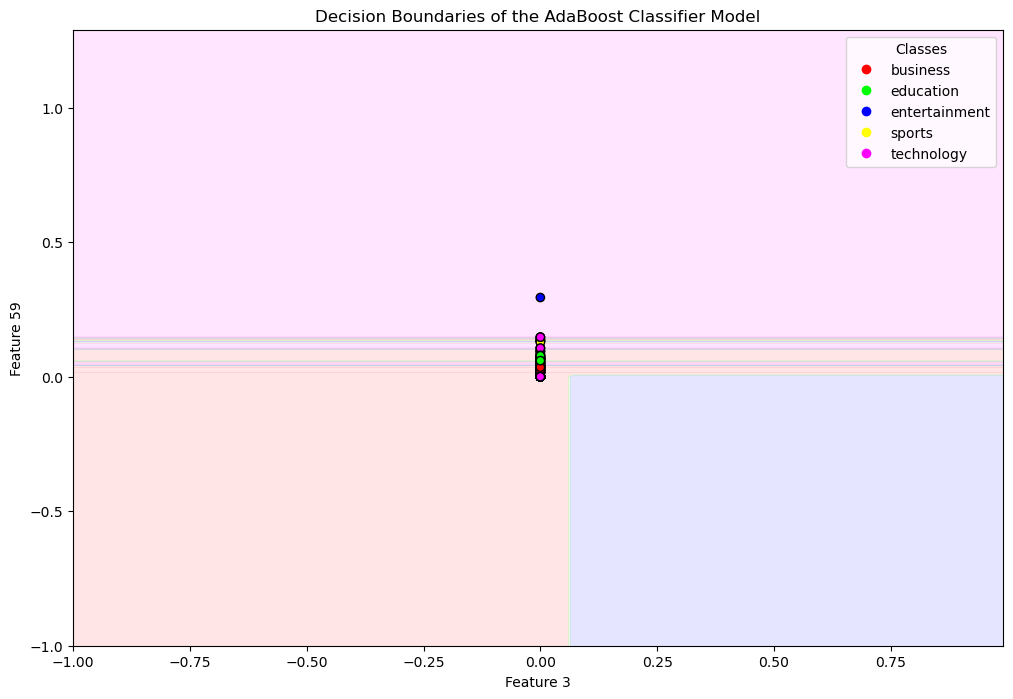

In [962]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_adab_model,
                               'AdaBoost Classifier',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

### *7.7. Support Vector Machine*

The **Support Vector Machine (SVM)** classifier is a powerful algorithm that finds the optimal hyperplane to separate different classes by maximizing the margin between them. It works well with both **linear and non-linear** data using different `kernel` functions (linear, polynomial, and radial basis function). The key hyperparameters tuned are `C` (regularization strength) and `kernel` type.

Setting up the mlflow environment for the Support Vector Machine (SVM) model

In [966]:
svm_experiment_name = 'SVM Model'
#experiment_id = mlflow.create_experiment(svm_experiment_name)
mlflow.set_experiment(svm_experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/486708073584427166', creation_time=1738578755690, experiment_id='486708073584427166', last_update_time=1738578755690, lifecycle_stage='active', name='SVM Model', tags={}>

#### *7.7.1 Developing the model and tracking the metrics on MLflow*

In [968]:
def develop_svm(X_train, X_validation, y_train, y_validation):

    svm = SVC(probability=True, random_state=42, shrinking=True)

    param_grid = {
        'C': np.logspace(0, 1, 2),  # Log-spaced C values
        'kernel': ['linear', 'rbf'], # Comparing linear vs. RBF kernel
        'max_iter' : [1000]
    }

    scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Set up RandomizedSearchCV
    svm_search = RandomizedSearchCV(svm,
                                    param_grid,
                                    n_iter=5,
                                    cv=2,
                                    scoring=scorer,
                                    n_jobs=-1,
                                    verbose=1,
                                    random_state=42
                                   )

    # Start mlflow run
    with mlflow.start_run(run_name="SVM GridSearchCV Try 1"):

        # Fit the RandomizedSearchCV
        svm_search.fit(X_train, y_train)

        # Log metrics for all parameter combinations
        results = svm_search.cv_results_

        for i in range(len(results['params'])):
            params = results['params'][i]

            # Predict on the validation set for each parameter combination
            model = svm_search.estimator.set_params(**params)
            model.fit(X_train, y_train)
            svm_y_pred = model.predict(X_validation)
            svm_y_pred_proba = model.predict_proba(X_validation)

            # Classification report and log loss
            report = classification_report(y_validation, svm_y_pred, output_dict=True)
            log_loss_value = log_loss(y_validation, svm_y_pred_proba)

            with mlflow.start_run(run_name=f"Run {i + 1}", nested=True):
                # Log parameters
                mlflow.log_params(params)

                # Log metrics from the classification report
                mlflow.log_metric('accuracy', report['accuracy'])
                mlflow.log_metric('precision_weighted', report['weighted avg']['precision'])
                mlflow.log_metric('recall_weighted', report['weighted avg']['recall'])
                mlflow.log_metric('f1_score_weighted', report['weighted avg']['f1-score'])
                mlflow.log_metric('log_loss', log_loss_value)
    
    
    

        best_model = svm_search.best_estimator_
        best_params = svm_search.best_params_
        y_best_pred = best_model.predict(X_validation)
        y_best_pred_proba = best_model.predict_proba(X_validation)
        best_report = classification_report(y_validation, y_best_pred, output_dict=True)
        best_log_loss_value = log_loss(y_validation, y_best_pred_proba)
        conf_matrix = confusion_matrix(y_validation, y_best_pred)

        # Log the best parameters
        mlflow.log_params(best_params)
        
        # Log metrics for the best model
        mlflow.log_metric('best_accuracy', best_report['accuracy'])
        mlflow.log_metric('best_precision_weighted', best_report['weighted avg']['precision'])
        mlflow.log_metric('best_recall_weighted', best_report['weighted avg']['recall'])
        mlflow.log_metric('best_f1_score_weighted', best_report['weighted avg']['f1-score'])
        mlflow.log_metric('best_log_loss', best_log_loss_value)

        mlflow.sklearn.log_model(best_model, 'best_model')

    print('Best Parameters:', svm_search.best_params_)
    print('Test Set Accuracy (Best Model):', best_report['accuracy'])
    print('Best cross validation log_loss (train):', -svm_search.best_score_)
    print('Best log loss (validation):', best_log_loss_value)

    # Returning the best model
    return best_model, conf_matrix, best_report, best_log_loss_value

In [969]:
best_svm_model, svm_conf_matrix, svm_class_report, svm_log_loss = develop_svm(X_train,
                                                                              X_validation,
                                                                              y_train,
                                                                              y_validation
                                                                             )
y_test_pred['Support Vector Machine'] = best_svm_model.predict(X_test_set)
y_test_pred_proba['Support Vector Machine'] = best_svm_model.predict_proba(X_test_set)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
🏃 View run Run 1 at: http://127.0.0.1:5000/#/experiments/486708073584427166/runs/df82da35a34f45b5bb30ca594ee2e2a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486708073584427166
🏃 View run Run 2 at: http://127.0.0.1:5000/#/experiments/486708073584427166/runs/728ea15557ae4fb1bf83f8bd71ccebf8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486708073584427166
🏃 View run Run 3 at: http://127.0.0.1:5000/#/experiments/486708073584427166/runs/bc69a89db229471fbae7cb8b21fa80ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486708073584427166
🏃 View run Run 4 at: http://127.0.0.1:5000/#/experiments/486708073584427166/runs/60f477383f85492a9c5bb53ab347d6d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486708073584427166


2025/02/05 19:01:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM GridSearchCV Try 1 at: http://127.0.0.1:5000/#/experiments/486708073584427166/runs/aebcd024849d4a9ebfba24458217e776
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/486708073584427166
Best Parameters: {'max_iter': 1000, 'kernel': 'linear', 'C': 1.0}
Test Set Accuracy (Best Model): 0.9881494986326345
Best cross validation log_loss (train): 0.06405417074955122
Best log loss (validation): 0.04421601937966296


In [970]:
svm_most_important_features, svm_least_important_features = svm_important_features(best_svm_model)

#### *7.7.2 Visualizing the Confusion Matrix of the best SVM*

<Figure size 800x800 with 0 Axes>

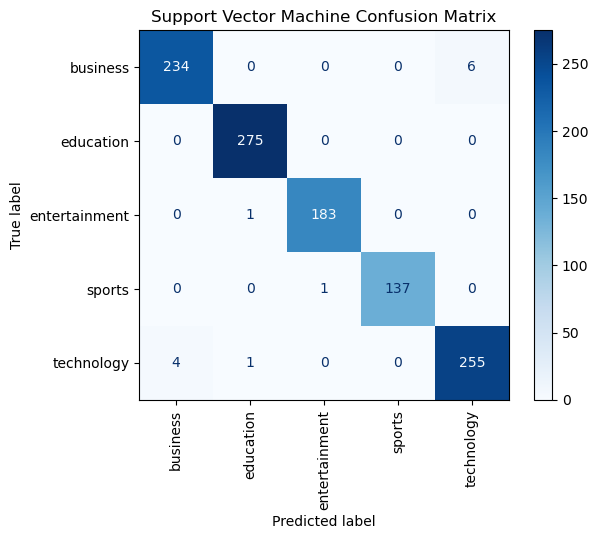

In [972]:
conf_matrix_visualizer(svm_conf_matrix, 'Support Vector Machine')

The confusion matrix of the SVM model shows a high accuracy in predicting most of the classes except the usual `technology` and `business` classes which have been a common point of weakness all the models trained in this section.

#### *7.7.3 Visualizing the decision boundaries of the SVM*

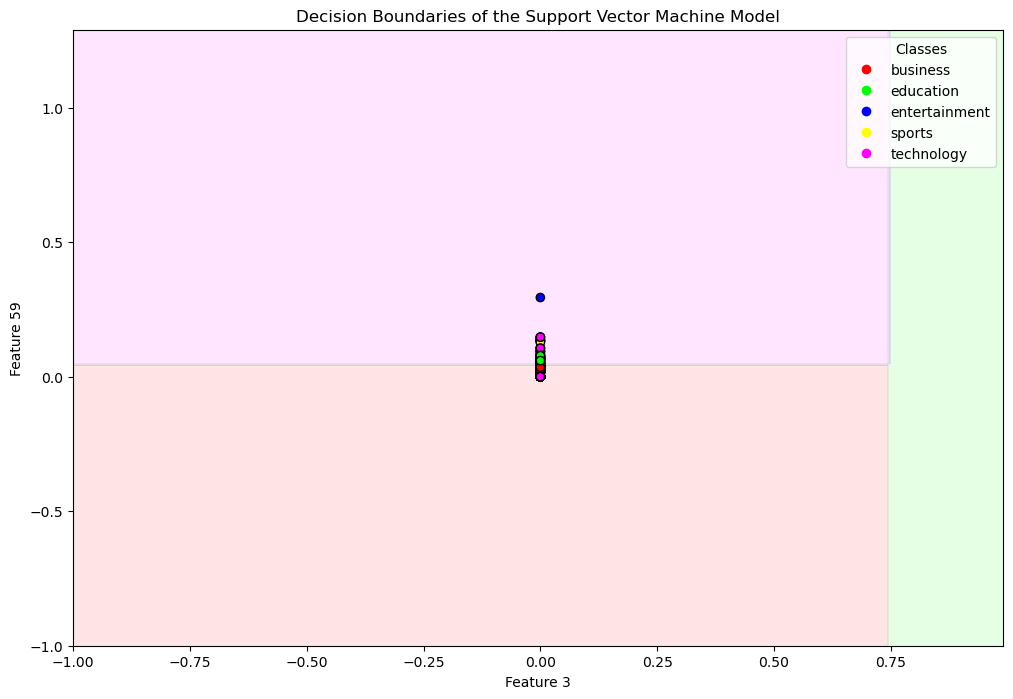

In [975]:
feature_indices = [3, 59] # Value range is [0-4386, 0-5999], shape(4387, 6000)
decision_boundaries_visualizer(best_svm_model,
                               'Support Vector Machine',
                               X_train,
                               X_validation,
                               y_train,
                               y_validation,
                               feature_indices
                             )

## **8. Model Evaluation**

Now that all the models have been trained and tuned, the predictions stored in the `y_test_pred` and `y_test_pred_proba` dictionaries are going to be used to determine which three models performed the best to the unseen `X_test_set` data. Starting with the functions for visualizing the accuracies and log loss values of the models.

### *8.1. Defining control function for evaluation*

Defining a function to display the accuracies of the models

In [980]:
def visualize_accuracies(class_report_dict):
    
    report = {
        model: report_v['accuracy']
        for model, report_v in class_report_dict.items()
    }
        
    plt.figure(figsize=(14, 5))
    bars = plt.bar(report.keys(), report.values(), color='#988558')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
                 ha='center', va='bottom', fontsize=10)
    
    # Add title and labels
    plt.title('Accuracy of the Models', weight='bold', fontsize=14)
    plt.xlabel('Models', labelpad=15, fontsize=11)
    plt.ylabel('Accuracy', labelpad=15, fontsize=11)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

Defining a function to display the log loss values of the models

In [982]:
def visualize_log_loss(log_loss_dict):

    plt.figure(figsize=(14, 5))
    bars = plt.bar(log_loss_dict.keys(), log_loss_dict.values(), color='#988558')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
                 ha='center', va='bottom', fontsize=10)
    
    # Add title and labels
    plt.title('Log Loss Values of the Models', weight='bold', fontsize=14)
    plt.xlabel('Models', labelpad=15, fontsize=11)
    plt.ylabel('Log Loss Value', labelpad=15, fontsize=11)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

Defining a function for evaluating the models based on their performances to the unseen data.

In [1039]:
def model_evaluation(y_test_pred, y_test_pred_proba):
    
    log_loss_dict = {}
    class_report_dict = {}
    confusion_matrix_dict = {}
    
    model_names = list(y_test_pred.keys())
    for i in range(0, len(model_names)):
        log_loss_dict[model_names[i]] = log_loss(y_test_set,
                                                 y_test_pred_proba[model_names[i]]
                                                 )
        class_report_dict[model_names[i]] = classification_report(y_test_set,
                                                                  y_test_pred[model_names[i]],
                                                                  output_dict=True
                                                                 )
        confusion_matrix_dict[model_names[i]] = confusion_matrix(y_test_set,
                                                                 y_test_pred[model_names[i]]
                                                                )

    return sorted(log_loss_dict, key=log_loss_dict.get)[:3], log_loss_dict, class_report_dict, confusion_matrix_dict

Defining a function for plotting a comparison of the models' metrics in the development (training) section vs the metrics in the evalution (testing) section.

In [986]:
def metric_plots(train_dict, test_dict, metric, y_scaler):
    
    # Extract class names and F1 scores
    #classes = [key for key in train_dict.keys()]
    model_names = list(train_dict.keys())
    train_values = list(train_dict.values())
    #test_value = [test_dict[cls]['f1-score'] for cls in classes]
    test_values = list(test_dict.values())
    
    # Plot
    x = np.arange(len(model_names))  # the label locations
    width = 0.4  # width of bars
    
    fig, ax = plt.subplots(figsize=(14, 5))
    rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='#913831', alpha=0.7)
    rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='#E5AA70', alpha=0.7)
    
    # Labels, title, and legend
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison: Train vs Test')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_ylim(0, y_scaler)
    ax.legend()
    
    # Show values on bars
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.show()

#### *8.2. Getting the metrics of the models*

Getting the F1-scores from the development section.

In [989]:
model_names = list(y_test_pred.keys())
train_f1_scores = {}
train_f1_scores[model_names[0]] = knn_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[1]] = nb_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[2]] = nn_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[3]] = lr_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[4]] = rf_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[5]] = adab_class_report['weighted avg']['f1-score']
train_f1_scores[model_names[6]] = svm_class_report['weighted avg']['f1-score']

Getting the accuracies from the development section.

In [991]:
train_accuracies = {}
train_accuracies[model_names[0]] = knn_class_report['accuracy']
train_accuracies[model_names[1]] = nb_class_report['accuracy']
train_accuracies[model_names[2]] = nn_class_report['accuracy']
train_accuracies[model_names[3]] = lr_class_report['accuracy']
train_accuracies[model_names[4]] = rf_class_report['accuracy']
train_accuracies[model_names[5]] = adab_class_report['accuracy']
train_accuracies[model_names[6]] = svm_class_report['accuracy']

Getting the log loss values from the development section.

In [993]:
train_log_loss = {}
train_log_loss[model_names[0]] = knn_log_loss
train_log_loss[model_names[1]] = nb_log_loss
train_log_loss[model_names[2]] = nn_log_loss
train_log_loss[model_names[3]] = lr_log_loss
train_log_loss[model_names[4]] = rf_log_loss
train_log_loss[model_names[5]] = adab_log_loss
train_log_loss[model_names[6]] = svm_log_loss

Getting the test F1-scores from the evaluation data (`X_test_set`).

In [995]:
test_f1_scores = {
    model: metrics['weighted avg']['f1-score'] for model, metrics in test_class_report.items()
}

Getting the test accuracies from the evaluation data (`X_test_set`).

In [997]:
test_accuracies = {
    model: metrics['accuracy'] for model, metrics in test_class_report.items()
}

#### *8.3. Model evaluation*

Here we visualise the performance metrics for each model considered and assess their efficiency when generalising across unseen data. Consequently, the three models that emerge as the best performers will be further analysed and ultimately used for the Streamlit application.

In [1041]:
best_three_models, test_log_loss, test_class_report, confusion_matrix_dict = model_evaluation(y_test_pred,
                                                                                             y_test_pred_proba
                                                                                             )

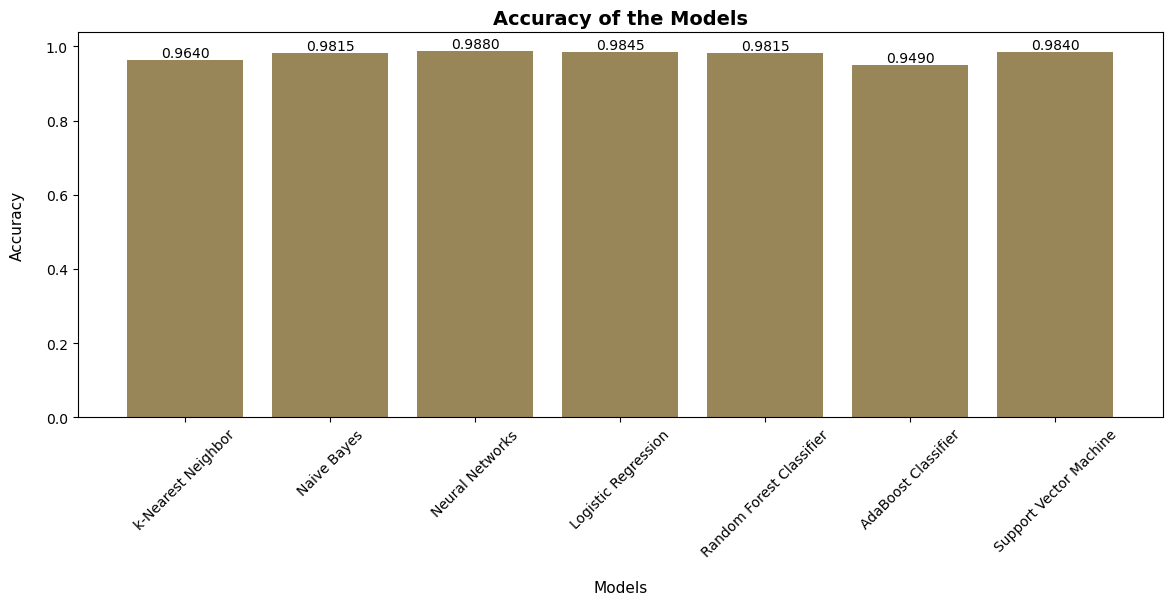

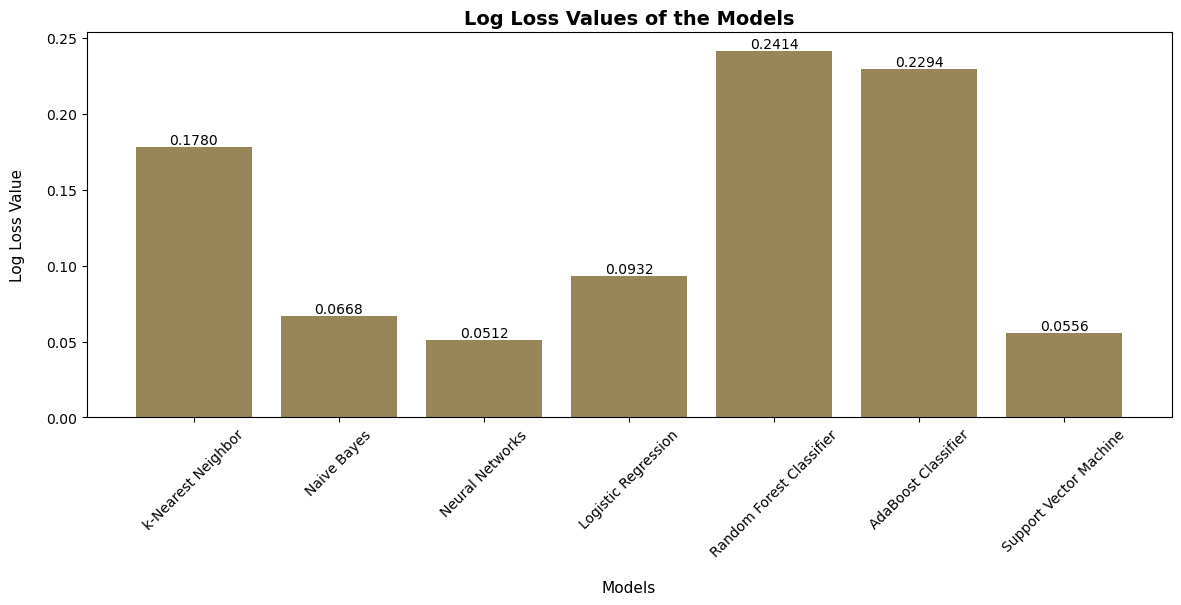

In [1004]:
visualize_accuracies(test_class_report)
visualize_log_loss(test_log_loss)

Looking at the first bar graph for accuracies, all models show high accuracy in their predictions with their ranging from around 0.949 to 0.988. These accuracy numbers give a false sense of confidence in the model and this is why the final models were not selected based on their accuracy. If we look at the log loss graph (the second bar graph), there is a significant discrepancy in the models' log loss values. For example, while the `Random Forest Classifier` has one of the highest accuracies, it has the worst log loss value (lower value is better in log loss). The log loss function works in such a way that the model is required to be accurate in all classes, even in the presence of an imbalance in the training data. On the other hand, the `Neural Networks` model has the best log loss valure at 0.0512 and the best accuracy at 0.988, making it the best performing model. The `Support Vector Machine` model comes second in log loss but third in accuracy, with values of 0.0556 and 0.984 respectively (this model is second because model selection is based entirely on the log loss). The third best model is the `Naive Bayes` model, with a log loss value of 0.0668 and an accuracy of 0.9815. 

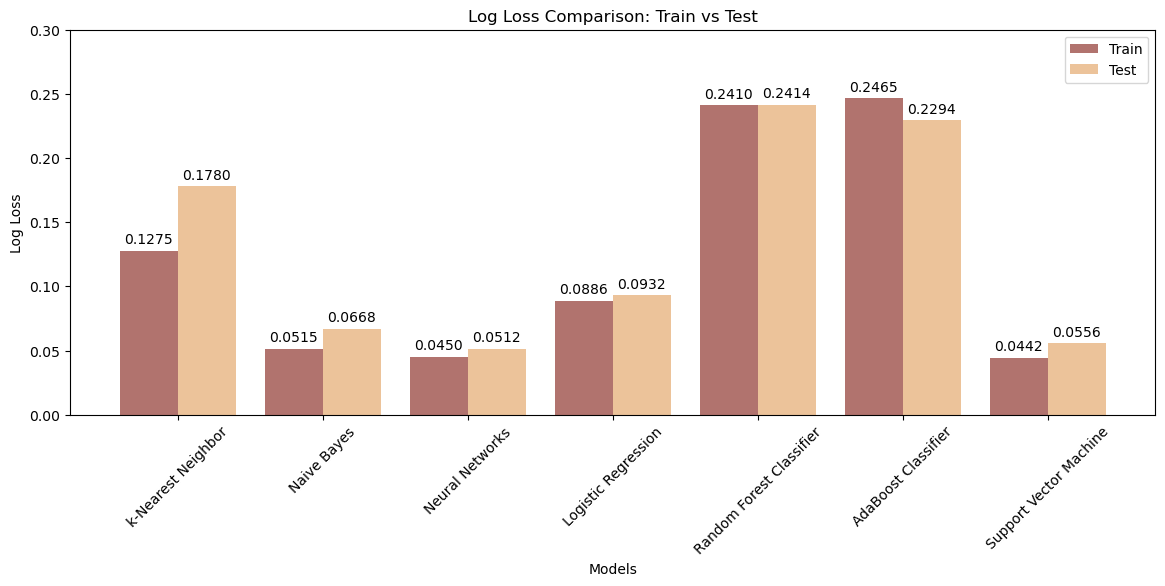

In [1008]:
metric_plots(train_log_loss, test_log_loss, 'Log Loss', 0.3)

Assessing the log loss plot for all the models, it is clear that `Neural Networks` model exhibits the best performance with the lowest log loss for both the training (`0.0450`) and test set (`0.0512`). Following closely are `Support Vector Machine` and `Naive Bayes` models, with log loss of (`0.0442` and `0.0556`) and (`0.0515` and `0.0668`) for the two sets respectively. This suggests that the models assign prediction probabilities that align closely with the actual article categories. Futhermore, it displays the models ability to generelize with new data efficiently. On the other hand, `Random Forest Classifier` and `AdaBoost Classifier` perform the worst amongst the models for both the training and test dataset. Thse elevated values exhibits the challenges the models possess with their prediction probabilites for some categories, where they likely overfit or underfit. Ultimately, `Neural Network`, `Support Vector Machine` and `Naive bayes` emerge as the best performing models, demonstration their efficiency with generalising new unseen data.

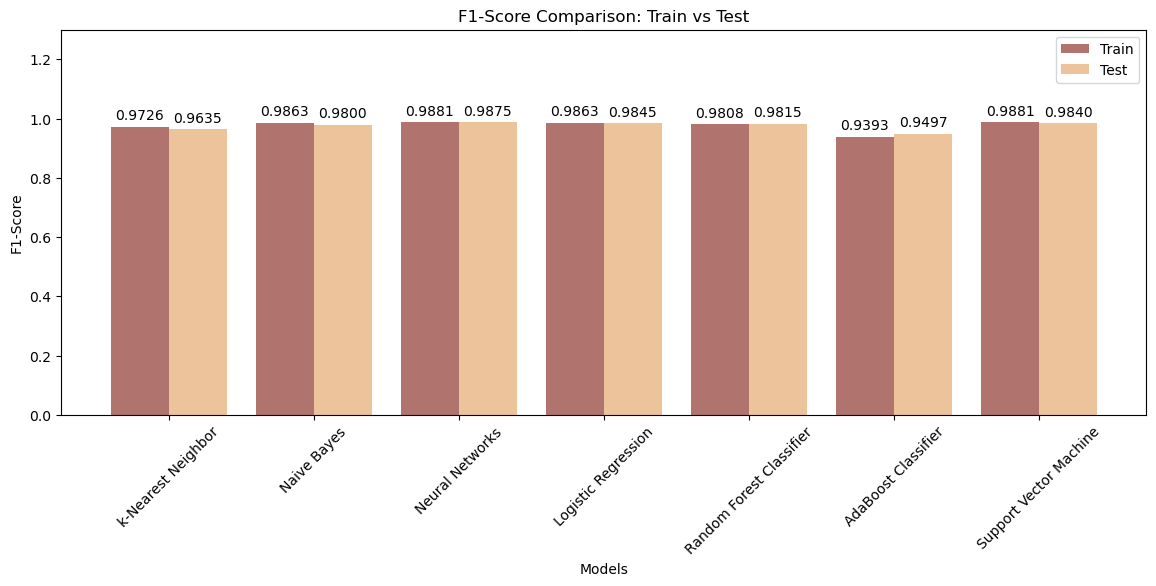

In [1009]:
metric_plots(train_f1_scores, test_f1_scores, 'F1-Score', 1.3)

Assessing the bar graph for F1-score, all models display strong performance. This performance metric established a balance between the precision and recall, asserting it as a more well grounded mectric for evaulting model performance with imbalanced data like ours. For the training set, the F1-scores range from `0.9393` to `0.9881` with `Support Vector Machine` performing the best. This performance is closely followed by `Neural Network` and `Naive Bayes` with values of `0.9881` and `0.9863`. A similar heirarchy is observed for the test set, but the `Random Forest Classifier` surpasses the perfromance of `Naive Bayes`. The consistent high performance of the models mentioned implies that they not only sustain robust recall buts also possess outstanding precision. Additionally, the models showcase their effectiveness with unseen data. For the training set, `AdaBoost` and `k-Nearest Neighbor` are the worst performing models amongst the rest, having achieved scores of `0.9393` and `0.9726` in that order. The two models also perform the worst with the test set, indicating potential overfitting or challenges with generalising with unseen data. Assessing the bar graph for log loss values, it becomes evident that the models exhibit significant differences in performance, with values ranging from 0.0442 to 0.2465. Unlike accuracy, which may not fully reflect a model's reliability in imbalanced datasets, log loss is a robust metric that penalizes incorrect predictions with higher confidence, providing a clearer picture of model performance. In conconclusion, the `Support Vector Machine`, `Neural Network` and `Naive Bayes` models shine as the best performers based on their outstanding performance across the datasets.

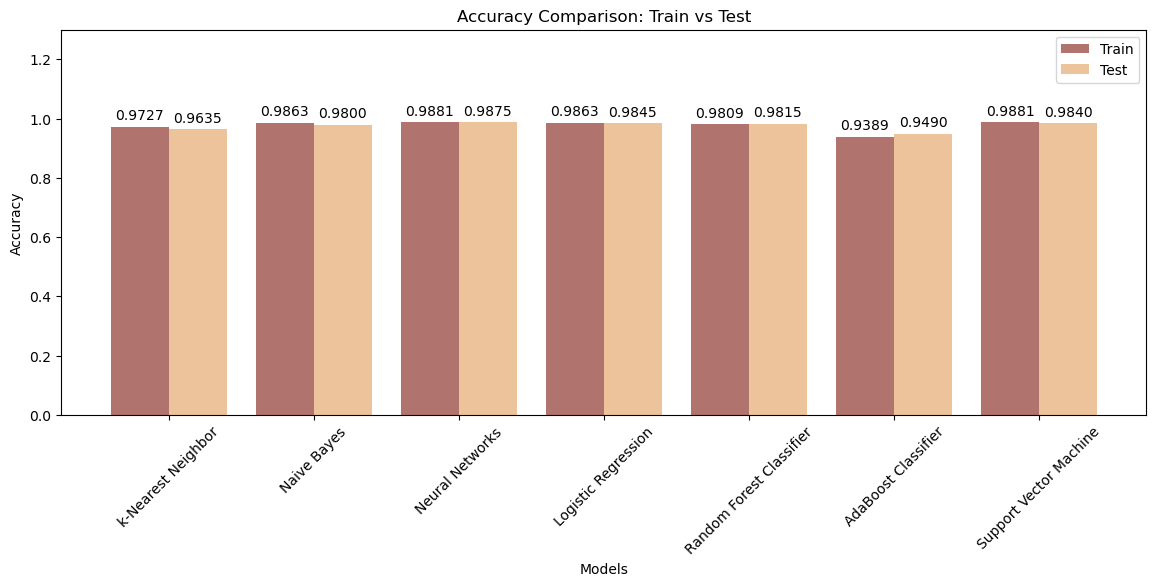

In [1010]:
metric_plots(train_accuracies, test_accuracies, 'Accuracy', 1.3)

Upon inspecting the bar graph for accuracies, we observe that all models show a relitively high accuracy for their predictions, with the minimum value being approximately `0.9389` and the maximum being `0.9881` for the training set. The test set values range approximately from `0.9490` to `0.9875`. The `Neural Networks` model achieved the highest test accuracy of `0.987`, closely followed by the `Support Vector Machine` and `Random Forest Classifier`  with accuracies of `0.9840` and `0.9815` respectively. The `AdaBoost Classifier` and `K-Nearest Neighbor` models obtained relatively low accuracy values of `0.9490` and`0.9635`. All things considered, the accuray values indicate that the models perform relatively well with unseen data. However, accuracy as a performance metric does not fully reflect the robustness of each model. As such a true distinction between the models performance can not be made using this metric, hence log loss and F1-scrore are the more reliable mectrics for model selection. With that being said, the best models are shown below, evaulated using log loss.

In [1007]:
print('The best three models are: ', best_three_models)

The best three models are:  ['Neural Networks', 'Support Vector Machine', 'Naive Bayes']


Overall the performance metrics consisdered above exhibit competive scores across the models, but it is without a doubt that the three best performing models are:
* `Neural Network`
* `Support Vector Machine`
* `Naive Bayes`

These models will be further evaluated to identify their most important and least important features.

### *8.4. Most important features of the best three models*

The feature importance across the `Support Vector Machine`, `Naive Bayes`, and `Neural Networks` model give us a glimpse into how the models priortizes different features when analysing data to cast predictions. 

#### *8.4.1. Naive Bayes Model*

In [1013]:
nb_most_important_features

,Feature,Importance
0,signeducation,0.277797
1,expressentertainment,0.274915
2,news,0.263373
3,signtechnology,0.257904
4,film,0.256490
5,bollywood,0.253888
6,entertainment,0.249317
7,click,0.247771
8,headline,0.244266
9,latest,0.240020


In [1014]:
nb_least_important_features

,Feature,Importance
0,leadership,0.0
1,lawcet,0.0
2,law,0.0
3,laundering,0.0
4,launching,0.0
5,laugh,0.0
6,latter,0.0
7,later,0.0
8,larger,0.0
9,large,0.0


The `Naive Bayes` models displays some of its important feature that are highly influential to the categorisation of the articles. These feature are onserved to be "signeducation," "expressertainment," and "news," and each posses a importance value supassing 0.266.For the least important features, they seem to hold an importance of 0, such features are "law","lawcet" and "leadership". This imples that the model is hardly depended on these features for classifiation. However, the difference between the highest and least important feature indicate that the model is fairly balanced when generalising with new data and distributes its reliance on a broad range of terms. 

#### *8.4.2. Neural Networks Model*

In [1016]:
nn_most_important_features

,Feature,Importance
4882,signeducation,8.459554
4880,signbusiness,7.788490
4889,signtechnology,7.613838
5176,student,6.652774
4883,signentertainment,6.248357
4888,signsport,5.927903
2005,film,5.612905
1655,education,5.458254
2688,institute,5.091725
69,actor,5.090423


In [1017]:
nn_least_important_features

,Feature,Importance
418,atm,1.913788e-62
3169,lucia,2.798284e-62
4279,ranjith,2.981015e-62
600,bhanwala,4.291767e-62
415,atf,5.534184e-02
4590,rouble,1.104967e-01
939,chitkara,1.786694e-01
2272,gqg,2.180580e-01
3827,participated,2.255040e-01
1009,cng,2.311369e-01


`Neural Network` displays the importance of a few features which do not exceed an importance value of 0.85.  The features that dominate are "Signeducation," "signbusiness," and "signtechnology". The model assigns a greater importance on these features, reflecting its ability to consider a variety of terms during classification. Additionally, there are no features that fall to zero, suggesting that every feature is considered at some level even if it is slight. The least important feature are "atm","lucia" and "ranjith".

#### *8.4.3. Support Vector Machine Model*

In [1019]:
svm_most_important_features

,Feature,Importance
2005,film,0.942763
5176,student,0.905386
4889,signtechnology,0.885487
4882,signeducation,0.811770
4880,signbusiness,0.778528
4630,said,0.761189
4883,signentertainment,0.688741
4888,signsport,0.683994
5636,university,0.664870
1066,company,0.642648


In [1020]:
svm_least_important_features

,Feature,Importance
160,ahsec,0.0
415,atf,0.0
418,atm,0.0
511,banaras,0.0
568,beeper,0.0
578,belgium,0.0
600,bhanwala,0.0
653,blundell,0.0
758,bulletin,0.0
776,cad,0.0


For the `Support Vector Machine`, the most important features are observed as "film","student" and "signtechnology" with an importance over 0.88. These indicate the models reliance on the presence of these features to cast accurate category predictions. The least important features are seen to hold an importance of zero, these include `"atm","atf" and "ahsec". This implies that there are a range of features that provide zero importance and should probably be eliminated from the feature set as a recommendation. The large importance difference between the most and least important  features suggest that the model has a slight possibility of overffiting to a few high-importance variables.



### *8.5. Confusion Matrix of the best three models*

<Figure size 800x800 with 0 Axes>

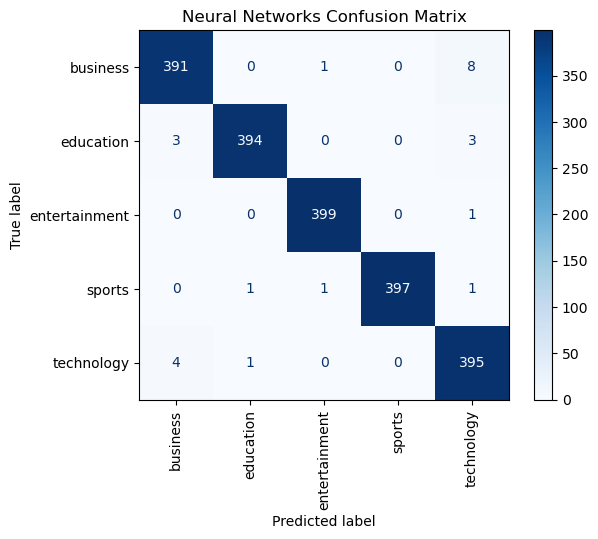

In [1053]:
conf_matrix_visualizer(confusion_matrix_dict[best_three_models[0]], 'Neural Networks')

The `Neural Network` confusion matrix demonstrates excellent classification performance across all categories as majority of the classes are correctly labled. There are a few trivial misclassification of education and entertainment. The model, however, is slightly likely to confuse business articles with technology one. This suggests potential similarities between the features used by the model for the two categories. Overall, the model peforms effectively with unseen data

<Figure size 800x800 with 0 Axes>

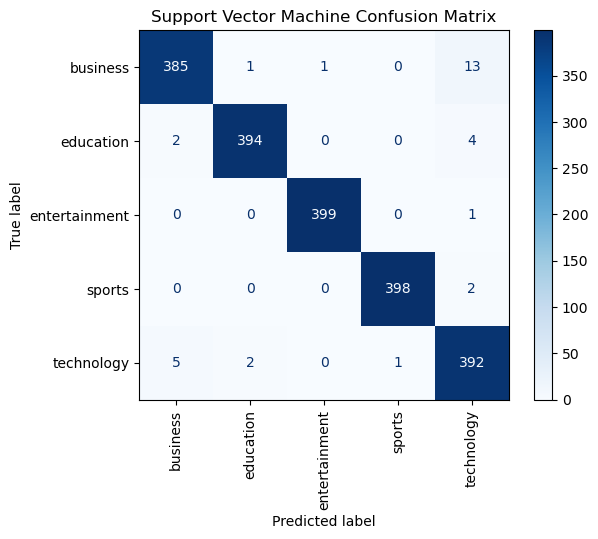

In [1049]:
conf_matrix_visualizer(confusion_matrix_dict[best_three_models[1]], 'Support Vector Machine')

The confusion matrix for `Support Vector Machine` model indicates a relatively high model performance with a greater number of classes being precisely classified. The number of misclassifications are relatively low and fairly balance acrossed the categories aside form business and technology. Like `Neural Network`, the model tends to confuse business ariticle for technology one. Thus, suggesting the models uses some vocabualry terms for technology that should primarly exist for business.



<Figure size 800x800 with 0 Axes>

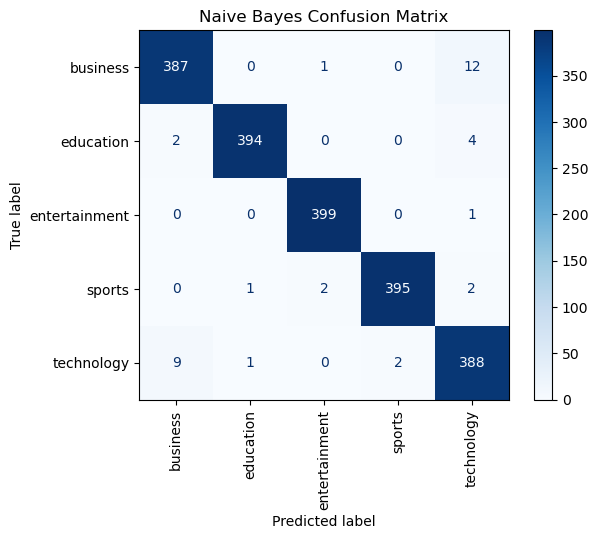

In [1051]:
conf_matrix_visualizer(confusion_matrix_dict[best_three_models[2]], 'Naive Bayes')

The consfusion matrix for `Naive Bayes` demostrate a strong model performance with a large number of categories being correctly classified. A small amount of misclassifiactions exist and are evenly spread across most categories. The confusion between the business and technology category prevails with this model as well. Thus demostrating some similarities with the key terms used to distinguish the business category from the technology one.

## **9. Model Deployment**

In this section, the three best models evaluated in the preceeding section will be stored into files that can later be utilised in app development. This will enable the app user to input article information and run the models. Ultimately, the predicted category will be determined by the models based on the article's content and displayed to the user on the app.

### *9.1. Storing the best models*

The Naive Bayes, Suppor Vector Machine and Neural Network models are stored into files that can be retieved by the applications, using the dump function from the module pickle.

In [ ]:
with open("naive_base_model.pkl", "wb") as file:
    pickle.dump(best_nb_model, file)

with open("neural_networks_model.pkl", "wb") as file:
    pickle.dump(best_nn_model, file)

with open("svm_model.pkl", "wb") as file:
    pickle.dump(best_svm_model, file)

### *9.2. Web application development*

The web application is developed using a python scricpt, and leverages the library streamlit. We designed it to contain the following pages:
* **Home:** An welcome page that informs the user about the purpose of the app and what categories the models are able to predict.
* **About the models:** A page that gives the user a brief description about the models and their functionslities.
* **About the data:** Supplies information regarding the model training data sourced from exploratory data analysis.
* **Category predictor:** Contains a text box where the users can input their article's content and predict its category.
* **About the team:** Displays information regarding the team responsible for the application.

The application determines the category of the article by taking in the input information and first applying the data preprocessing steps defined the the preceeding notebook sections. The vocabulary stored during the vectorisation of the training data is utilised to create features for the input text. This ensures the input data is in the format compatible with our models. Following this, the pickled files of the models are opened. Subsequently, the data is processed by all three models simultaneously and the modal category is displayed for the user to see. This is done to combine the classification strenghts of all three models and reduces the probability of casting an incorrect prediction by one of the models. In an instance where the all models predict a unique category, the application displays the prediction from the neural network model since it possess a lower log loss and is the most accurate amongst the three.

The application can be viewed [here](https://news-article-app-team-3.streamlit.app/).
  

## **10. Conclusion and Recommendations**

### *10.1. Conclusion*

In this project, we configured a predictive model to identify the category of a given news article. There were 7 models that were developed using training data and a validation set. This was to optimise the selection of the best hyperparameters for each  model type. The models were successfully evaluated with unseen data. The evaluation utilised an optimization process called Grid Search, which used cross validation and log loss as  the performance metric. The  3 models that  outperformed other models were  Support Vector Machine, Neural Networks and Naive Bayes classifier. They had a log loss of `0.0556` , `0.0512`, and `0.0668` respectively and were able to correctly predict the category with a minimum accuracy of `98 %`. However, the models are +-`1.07 %` likely to misclassify business articles as technology, and the converse is true.  The models were  deployed on Streamlit app that enables users to plug in their articles’ content and retrieve their predicted category. 

### *10.2. Recommendations*

1. Investigate model performance based on externally sourced data to assess efficacy when presented with differently structured articles than that of the datasets used for development and evaluation.
2. Update the model to better predict articles where the url content does not contain the target category.
3. Update the model to cast predictions with missing information such as the description and url.
4. Update the model to identify additional categories such as health and politics.


## **11. References**

1. Adekunle, O. (2025) 2407FTDS_Classification_Project. https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/train.csv (Accessed: January 13, 2025).
2. Adekunle, O. (2025) 2407FTDS_Classification_Project. https://github.com/DareSandtech/2407FTDS_Classification_Project/raw/refs/heads/main/Data/processed/test.csv (Accessed: January 13, 2025).